# Import Files

In [1]:
from os import listdir
from os.path import isfile, join
mypath = "../images"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(str(len(file_names)) + ' images loaded')

97 images loaded


# Sift and Glcm 

In [2]:
import cv2
import numpy as np
from skimage.feature import  graycomatrix, graycoprops
images_sift = []
glcm=[]
labels = []
size = 128
sift = cv2.SIFT_create()
cataract=0
normal=0
for i, file in enumerate(file_names):
        image = cv2.imread(mypath+"/"+file,0)
        h,w=image.shape
#         if(h>128 and w>128):
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        img_arr = np.array(image)
        gCoMat = graycomatrix(img_arr, [1], [0],256,symmetric=True, normed=True) # Co-occurance matrix
        contrast = graycoprops(gCoMat, prop='contrast')[0][0]
        dissimilarity = graycoprops(gCoMat, prop='dissimilarity')[0][0]
        homogeneity = graycoprops(gCoMat, prop='homogeneity')[0][0]
        energy = graycoprops(gCoMat, prop='energy')[0][0]
        correlation = graycoprops(gCoMat, prop='correlation')[0][0]
        keypoints, descriptors = sift.detectAndCompute(image,None)
        descriptors=np.array(descriptors)
        descriptors=descriptors.flatten()
        glcm.append([contrast,dissimilarity,homogeneity,energy,correlation])
        images_sift.append(descriptors[:2304])

        #print(descriptors.shape)
        if file_names[i][0] == "c":
            cataract+=1
            labels.append(1)
        if file_names[i][0] == "n":
            normal+=1
            labels.append(0)

print("Testing and validation split done!")


Testing and validation split done!


In [3]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [4]:
len(labels)

97

In [5]:
images_sift=np.array(images_sift)
images_sift.shape

(97, 2304)

In [6]:
glcm=np.array(glcm)
images_sift_glcm=np.concatenate((images_sift,glcm),axis=1)
images_sift_glcm.shape

(97, 2309)

In [7]:
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


rf_class = RandomForestClassifier(n_estimators=100, criterion='entropy',max_features='sqrt', max_depth=3, n_jobs=2,
random_state=1337)
svm_poly=svm.SVC(kernel='poly',gamma=0.1,C=10)
knn= KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2) 
log = LogisticRegression(solver='saga',penalty='l1')

model_names={"Random Forest":rf_class,"SVM":svm_poly,"k nearest neighbor":knn,"logistic regression":log}

In [8]:
def testing(model_name,X_train, X_test, y_train, y_test):
    model=model_names[model_name]
    model.fit(X_train,y_train)
    yhat = model.predict(X_test)
    # evaluate predictions
    acc = accuracy_score(y_test, yhat)
    print(model_name,'\tAccuracy: %.3f' % acc)
    print(confusion_matrix(y_test, yhat))
    print("\n\n")

In [9]:
def result(dataset):
    #Normalization
    #min_max_scaler = preprocessing.StandardScaler()
    #x_scaled = min_max_scaler.fit_transform(dataset)
    
    
    #panda dataframe 
    df=pd.DataFrame(data=dataset)
    df['label']=labels
    df=df.sample(frac=1)
    X=df.drop(['label'], axis = 1)
    y=df['label']
    
    
    #Different model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    for model in ["Random Forest","SVM","k nearest neighbor","logistic regression"]:
        testing(model,X_train, X_test, y_train, y_test)

In [10]:
print("Sift testing..........\n")
result(images_sift)

Sift testing..........

Random Forest 	Accuracy: 0.800
[[ 9  3]
 [ 2 11]]



SVM 	Accuracy: 0.880
[[10  2]
 [ 1 12]]



k nearest neighbor 	Accuracy: 0.800
[[ 7  5]
 [ 0 13]]



logistic regression 	Accuracy: 0.880
[[10  2]
 [ 1 12]]





c:\users\home\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [11]:
print("glcm testing..........\n")
result(glcm)

glcm testing..........

Random Forest 	Accuracy: 0.800
[[10  4]
 [ 1 10]]



SVM 	Accuracy: 0.720
[[11  3]
 [ 4  7]]



k nearest neighbor 	Accuracy: 0.840
[[10  4]
 [ 0 11]]



logistic regression 	Accuracy: 0.680
[[13  1]
 [ 7  4]]





c:\users\home\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [12]:
print("sift and glcm combined testing..........\n")
result(images_sift_glcm)

sift and glcm combined testing..........

Random Forest 	Accuracy: 0.920
[[12  1]
 [ 1 11]]



SVM 	Accuracy: 0.920
[[13  0]
 [ 2 10]]



k nearest neighbor 	Accuracy: 0.840
[[ 9  4]
 [ 0 12]]



logistic regression 	Accuracy: 0.880
[[13  0]
 [ 3  9]]





c:\users\home\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


# RF

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [15]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
df=pd.DataFrame(data=images_sift)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']


#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.600
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.560
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.560
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.560
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.560
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.720
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.680
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.680
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.720
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.720
Classification accuracy on test set with max features = log2 and max_depth = None: 0.840
Classification accuracy on test set with max features = log2

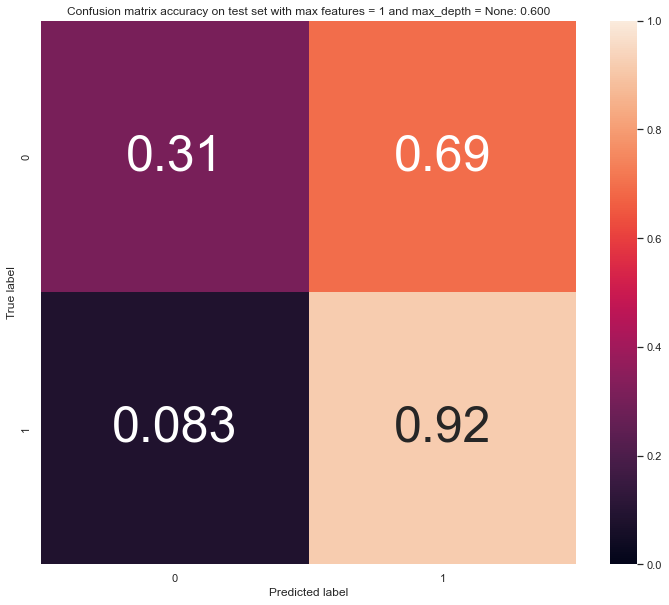

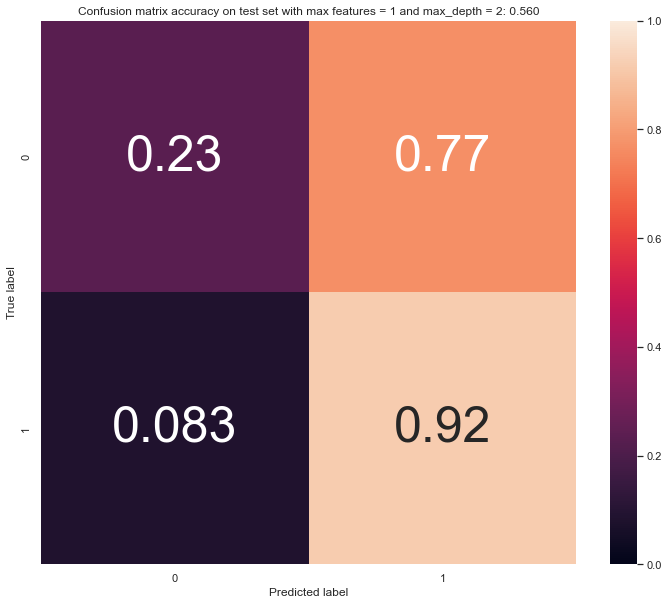

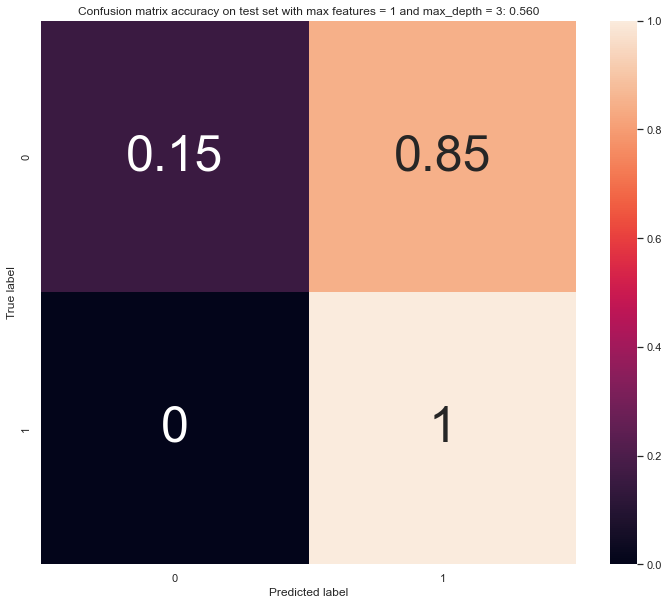

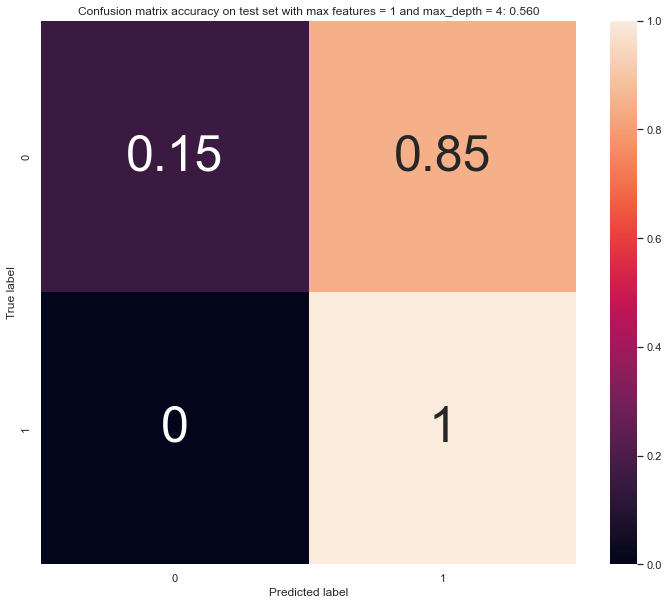

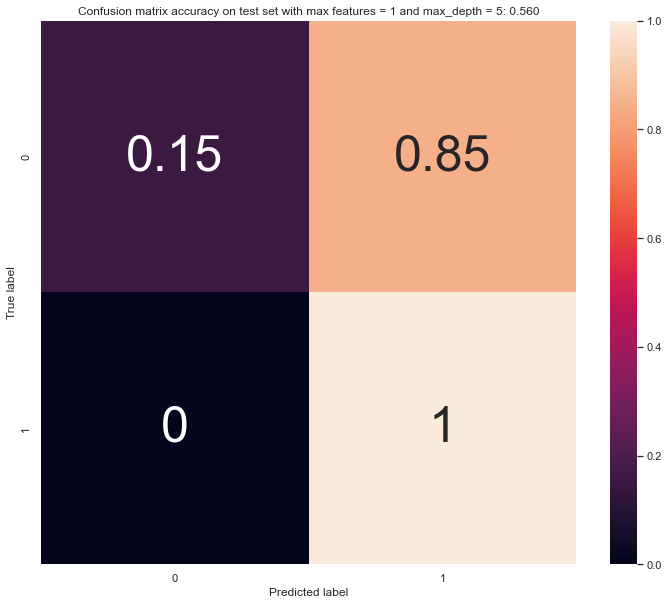

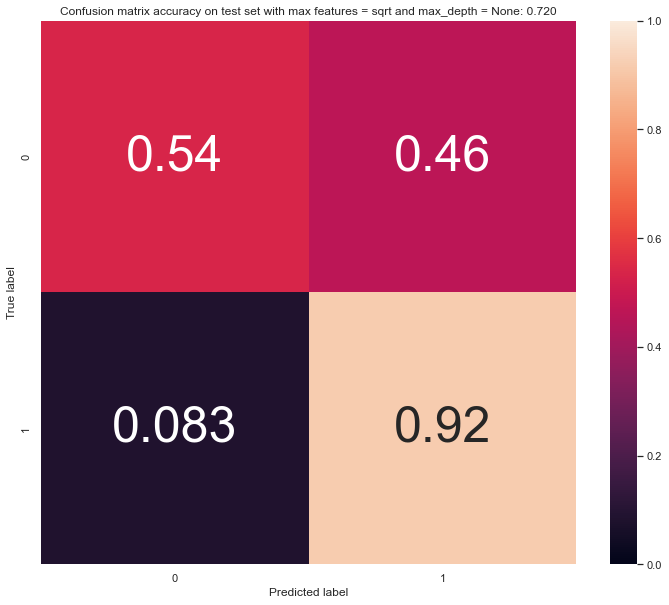

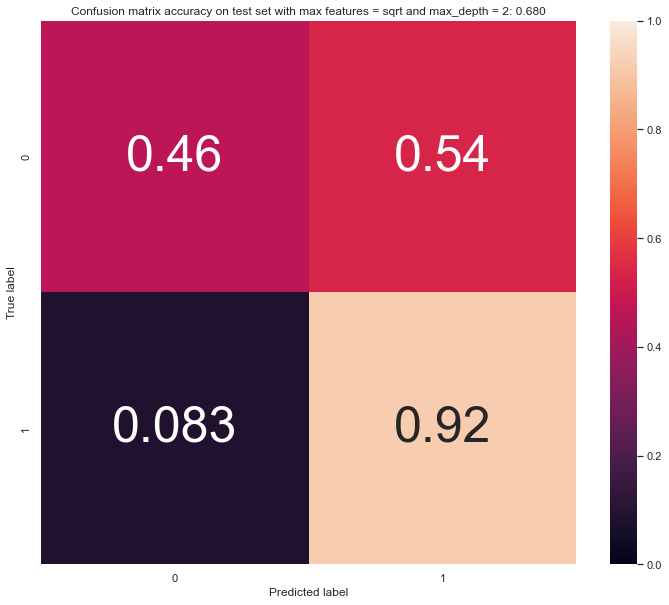

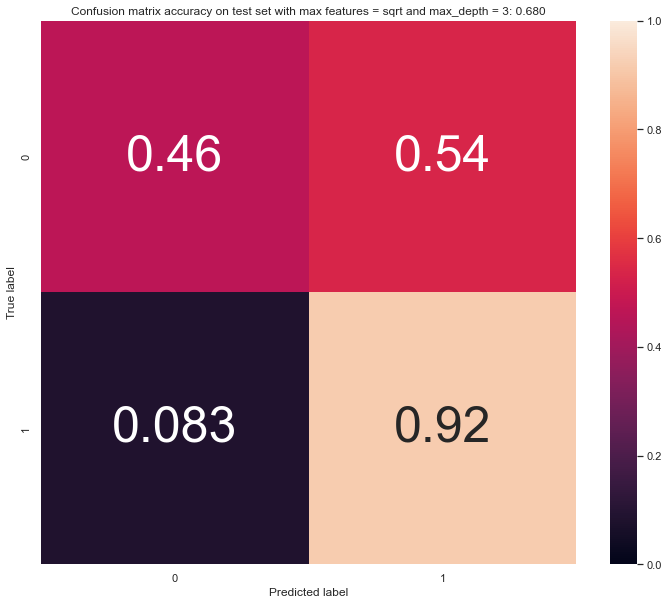

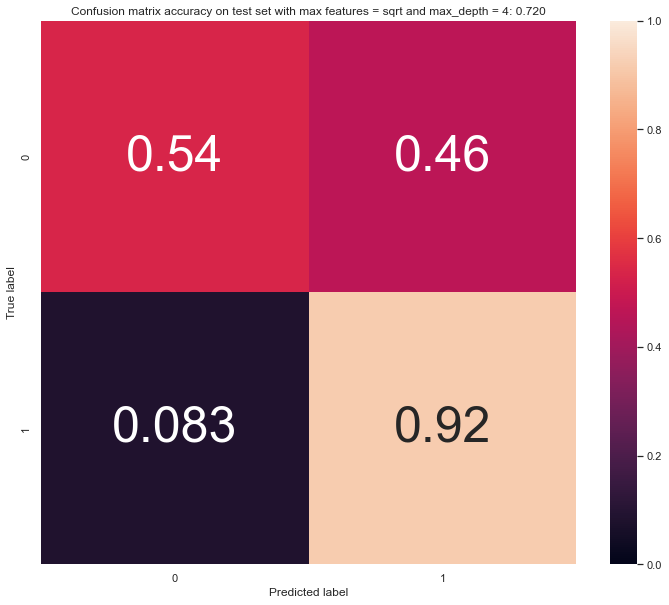

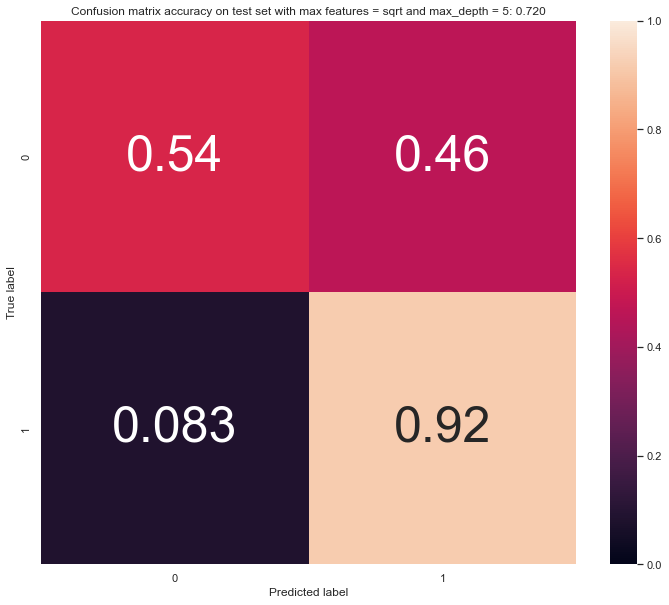

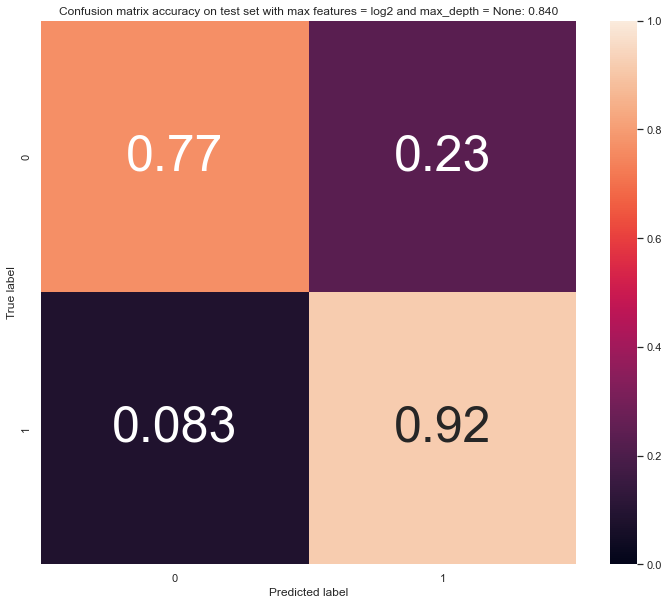

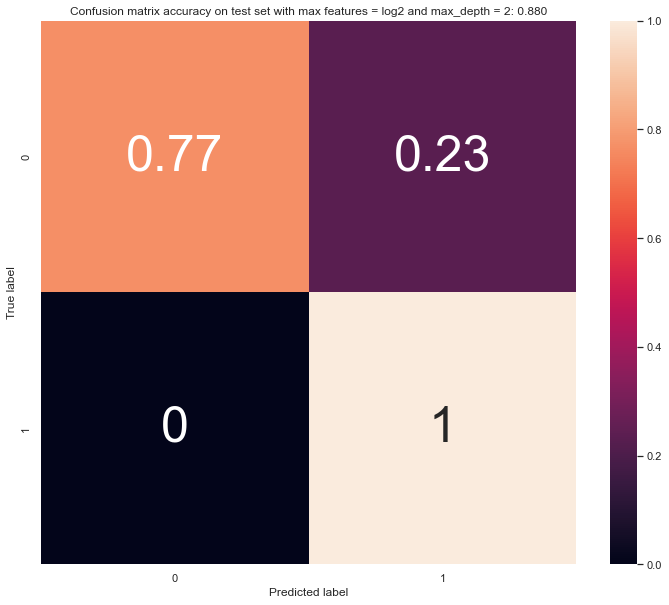

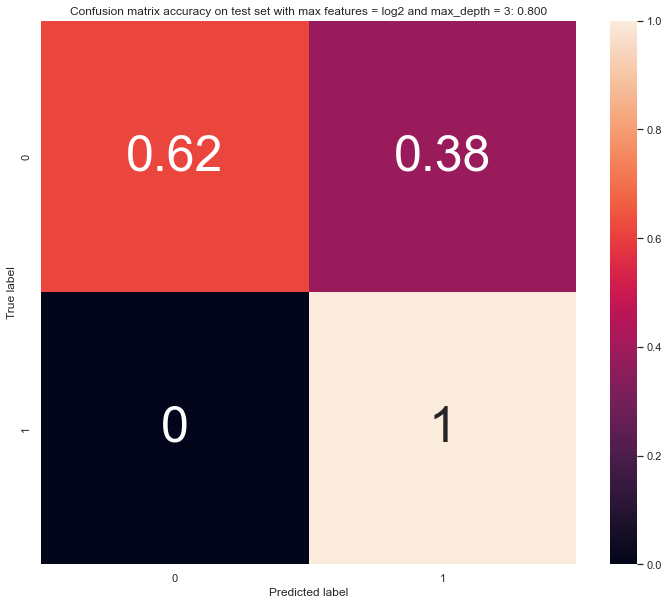

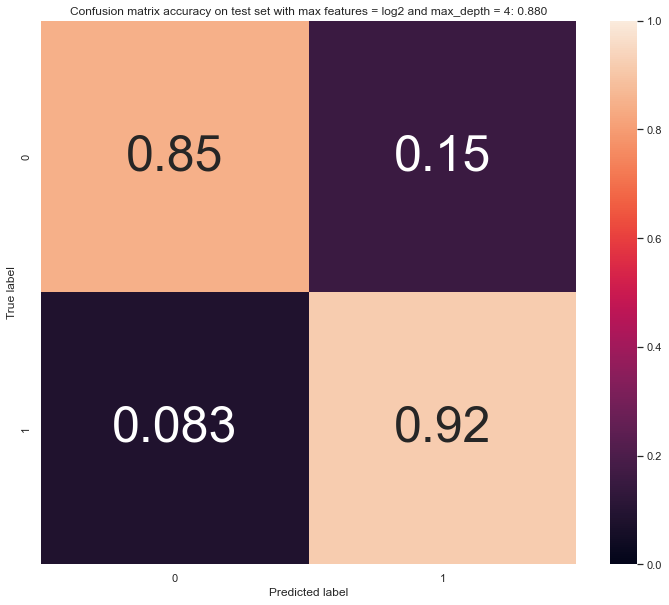

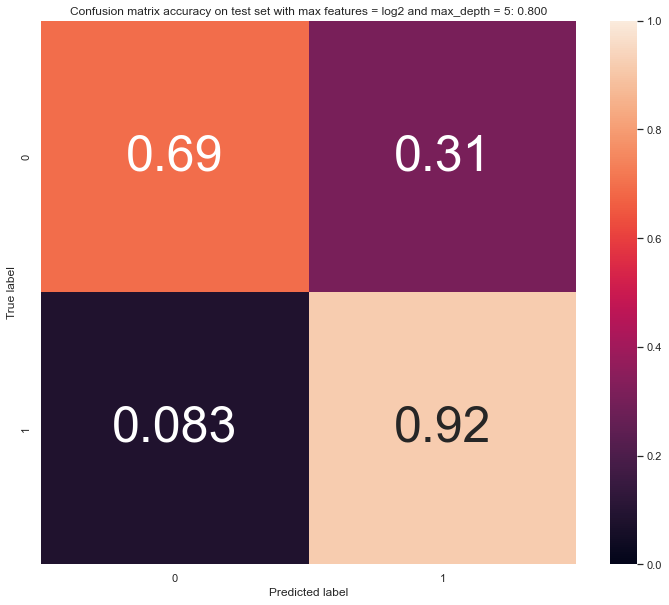

In [17]:
from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

In [18]:
df=pd.DataFrame(data=glcm)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']


#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.640
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.600
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.600
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.600
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.640
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.600
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.600
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.600
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.600
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.600
Classification accuracy on test set with max features = log2 and max_depth = None: 0.600
Classification accuracy on test set with max features = log2

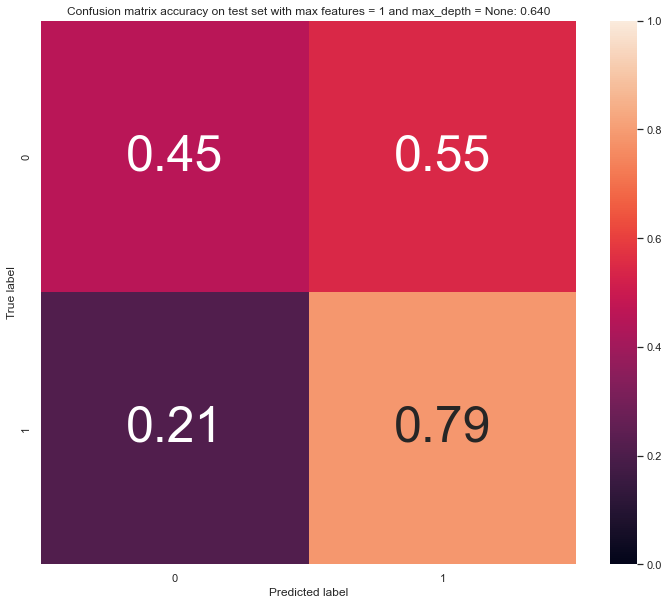

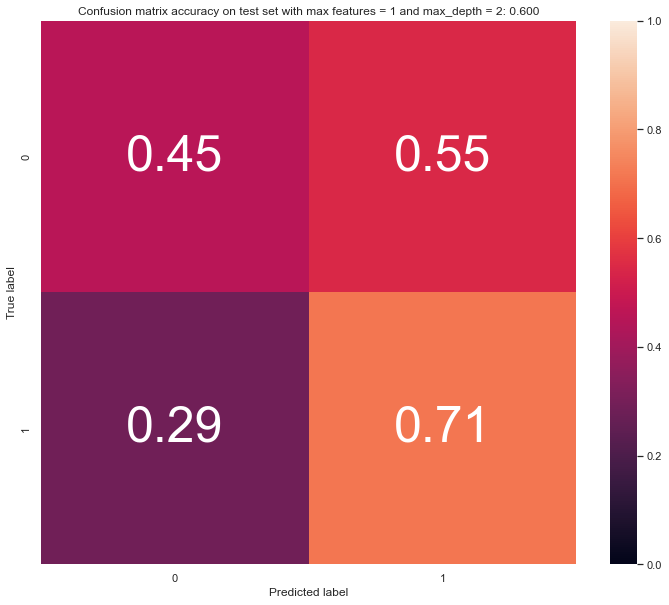

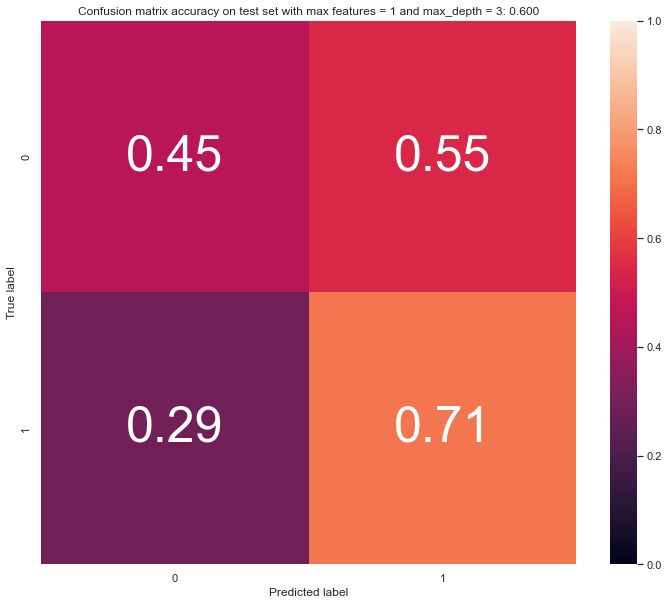

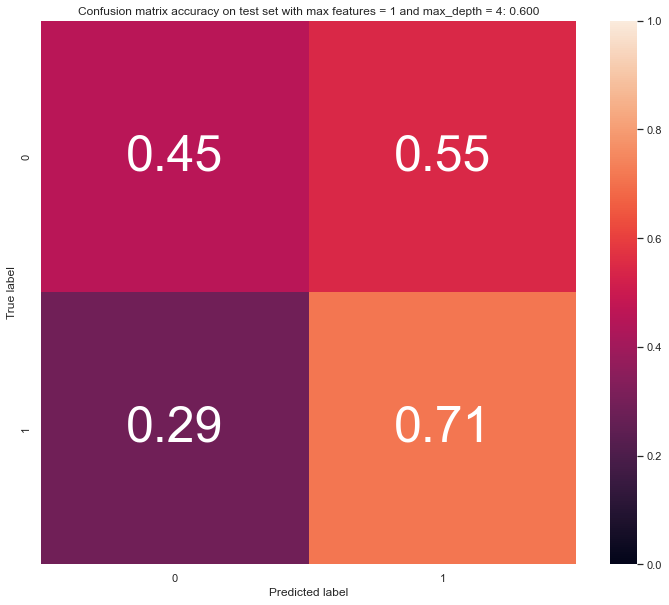

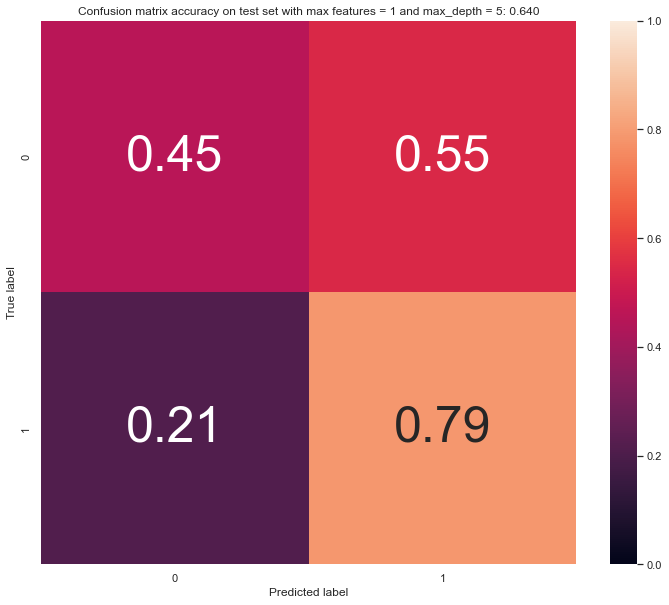

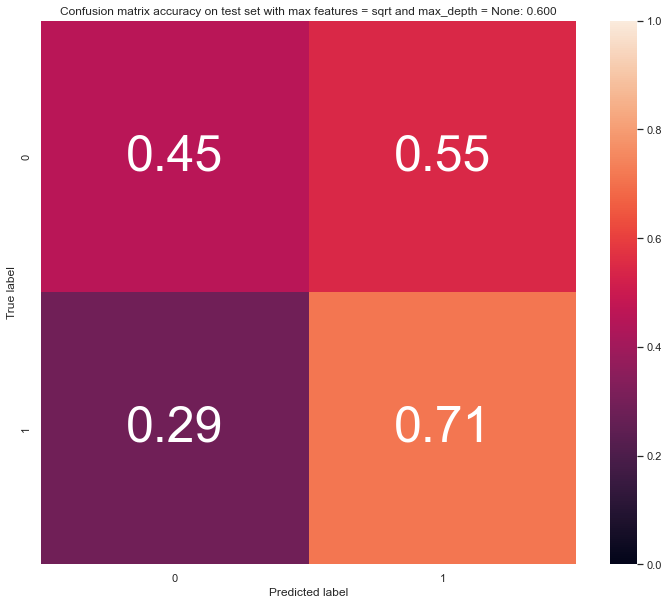

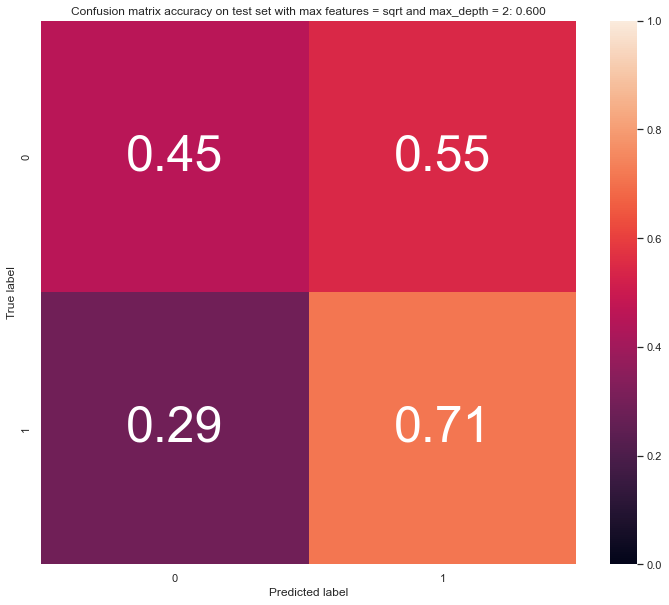

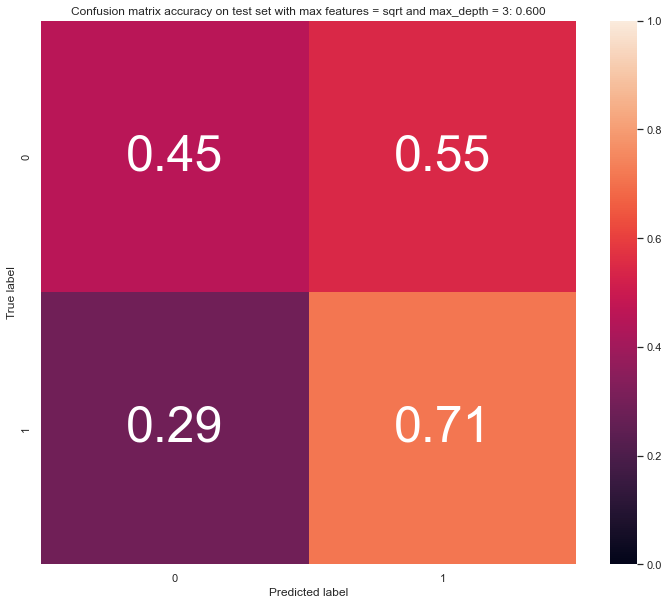

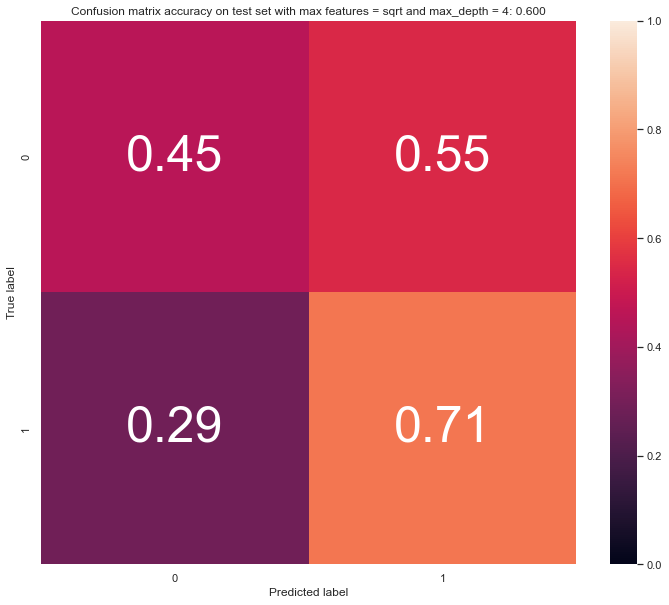

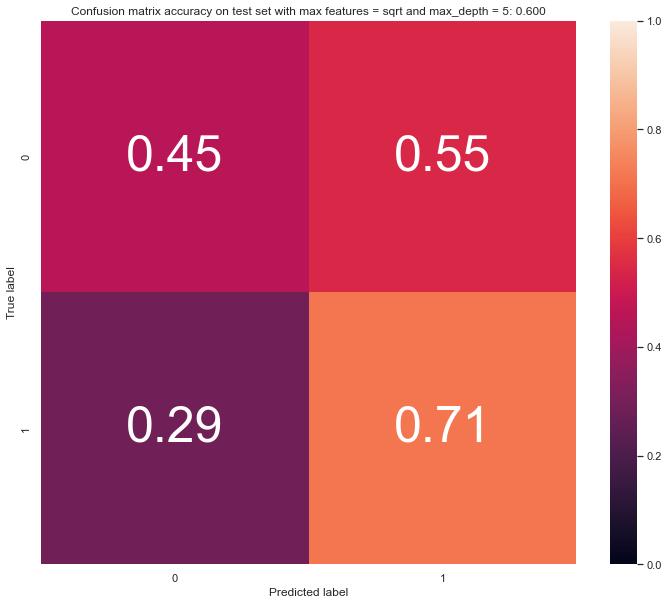

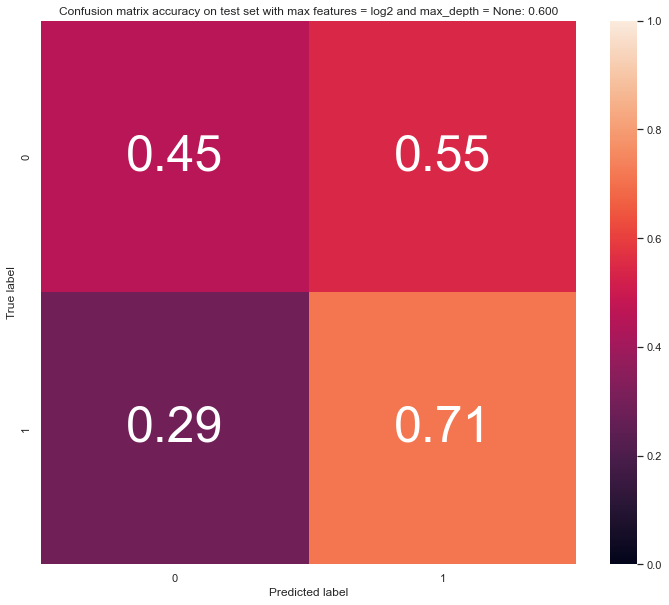

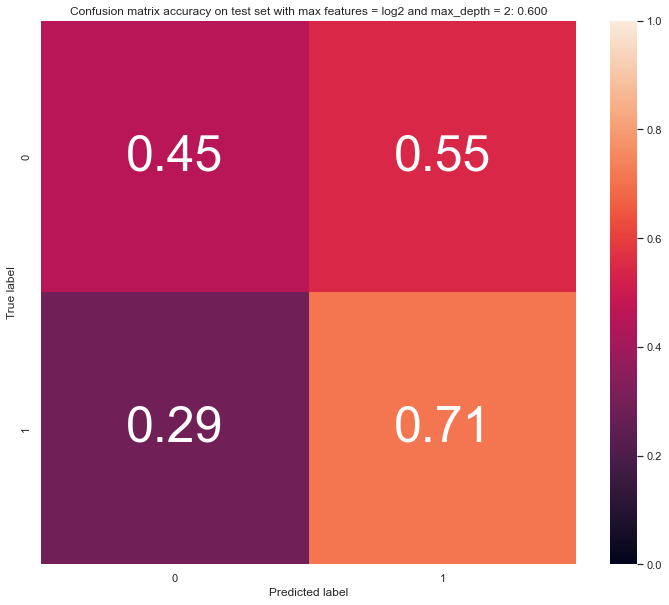

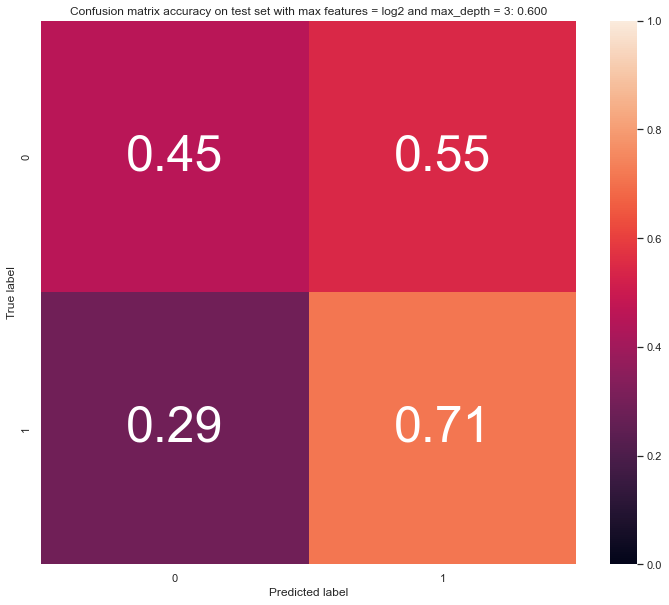

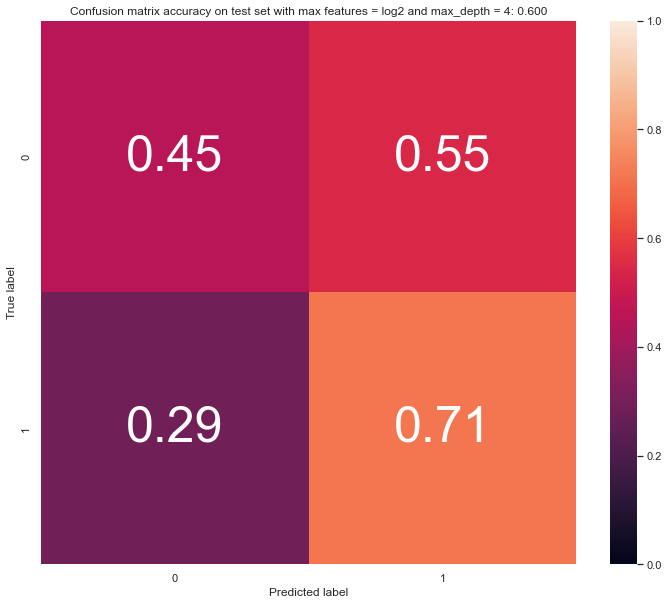

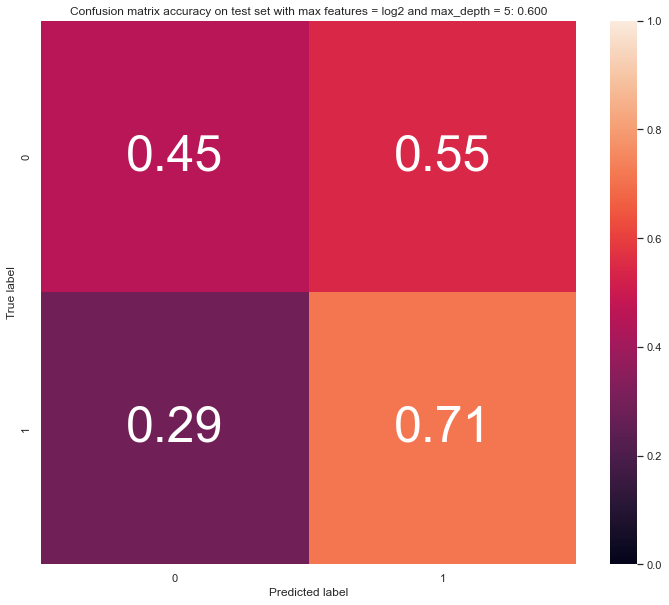

In [19]:
from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

In [20]:
df=pd.DataFrame(data=images_sift_glcm)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']


#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.720
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.800
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.760
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.760
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.920
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.920
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.920
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.960
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.920
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.920
Classification accuracy on test set with max features = log2 and max_depth = None: 0.880
Classification accuracy on test set with max features = log2

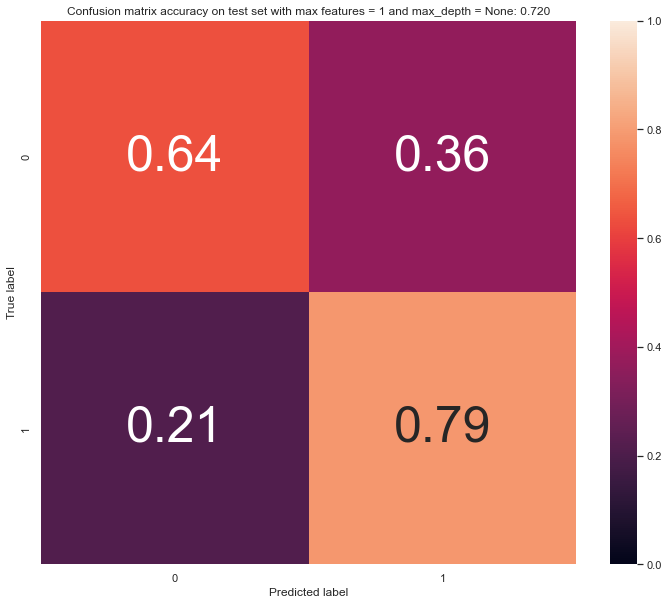

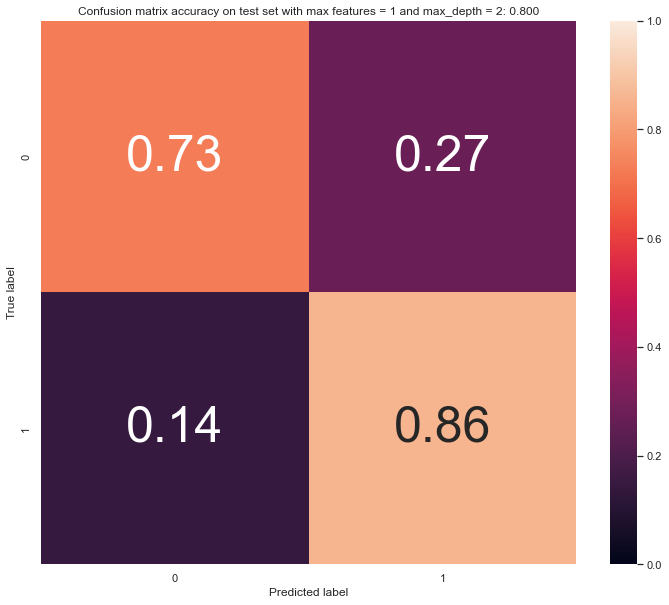

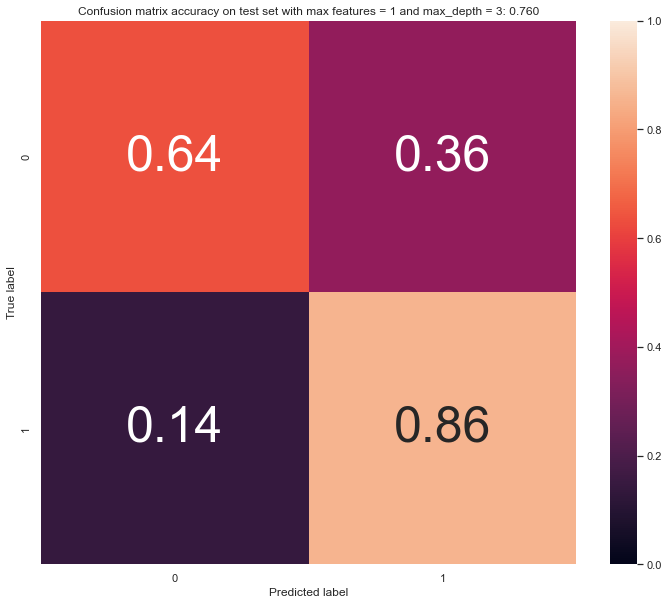

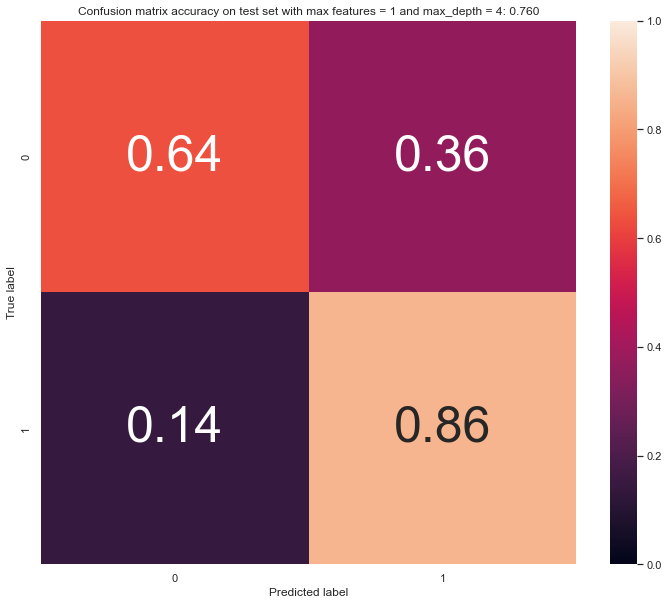

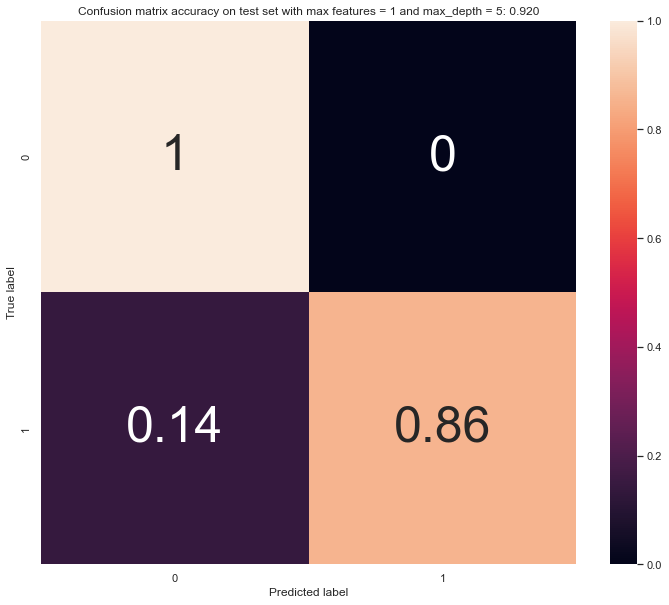

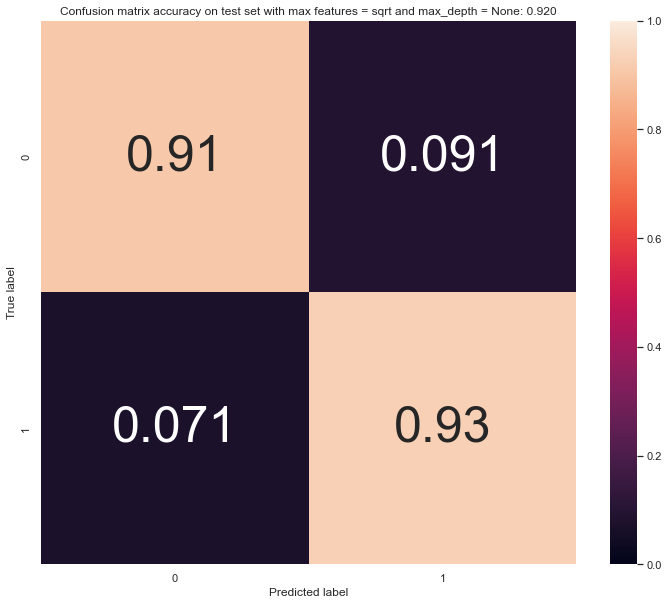

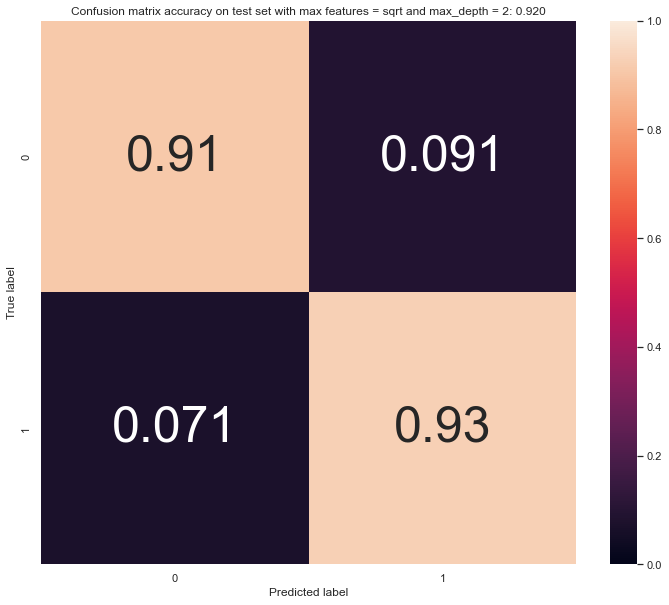

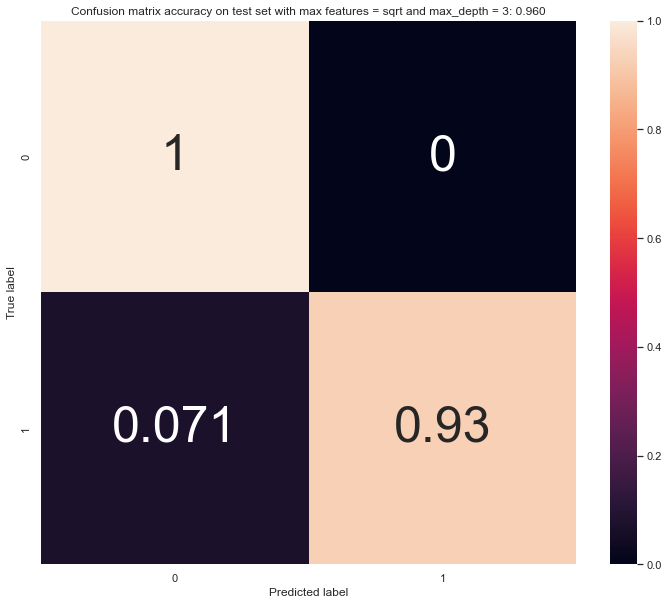

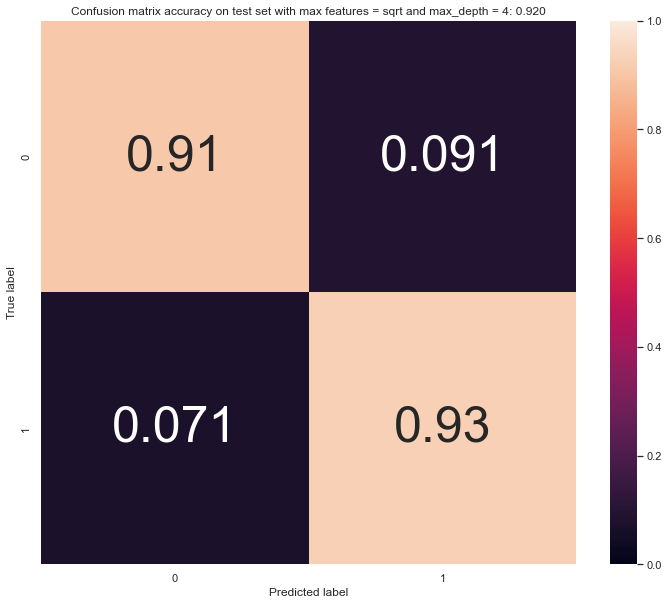

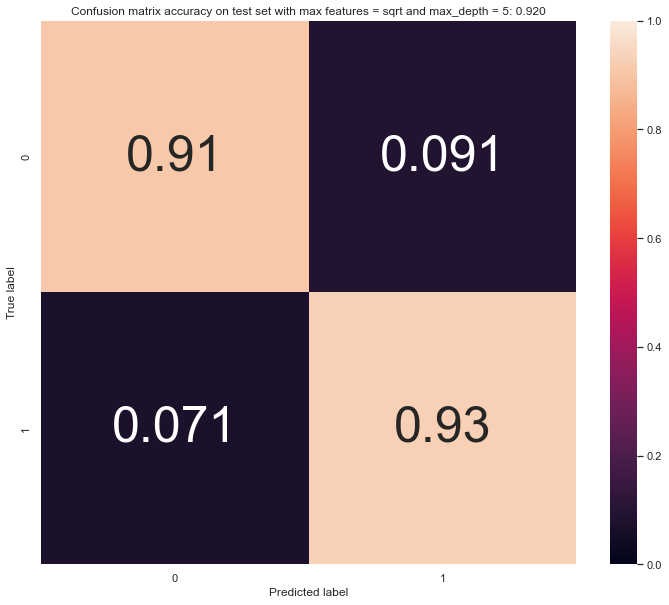

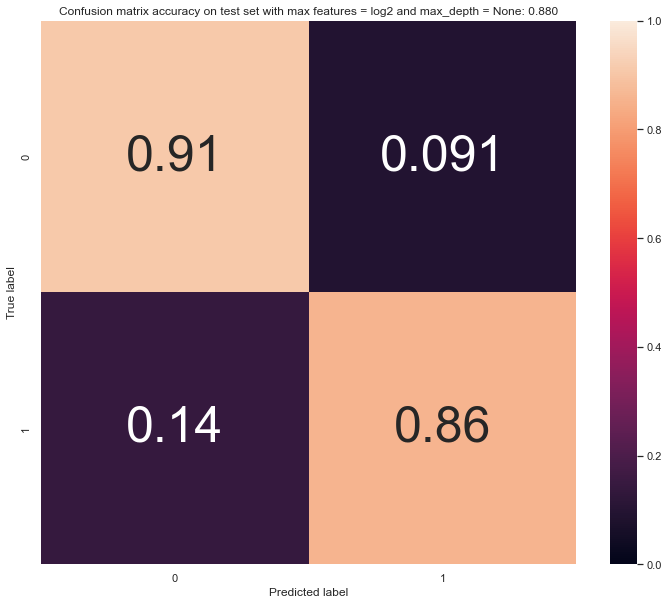

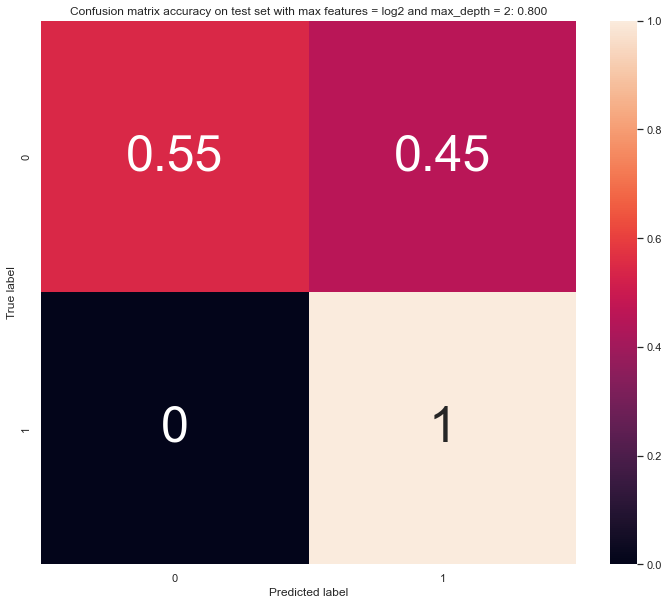

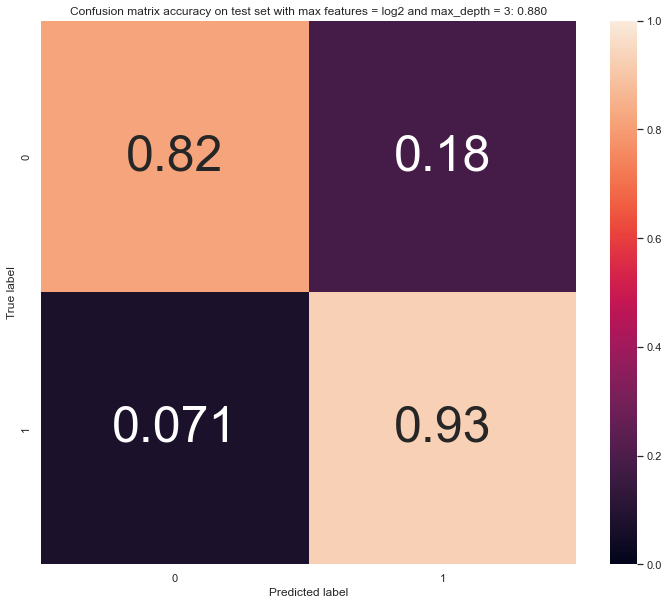

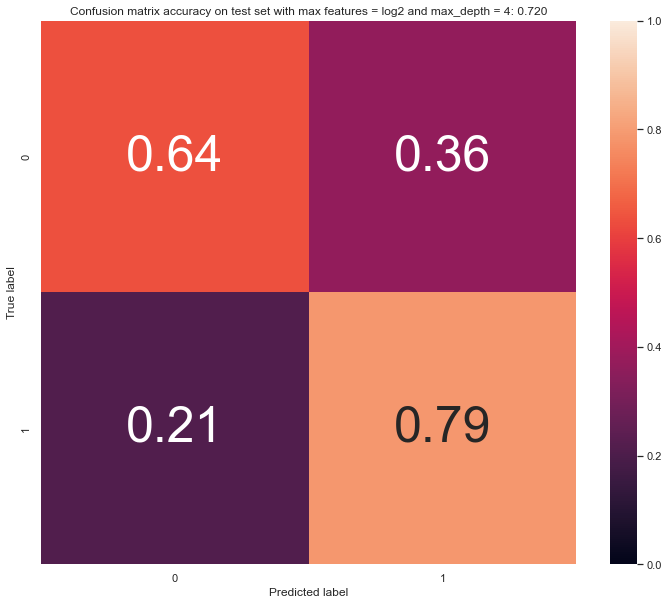

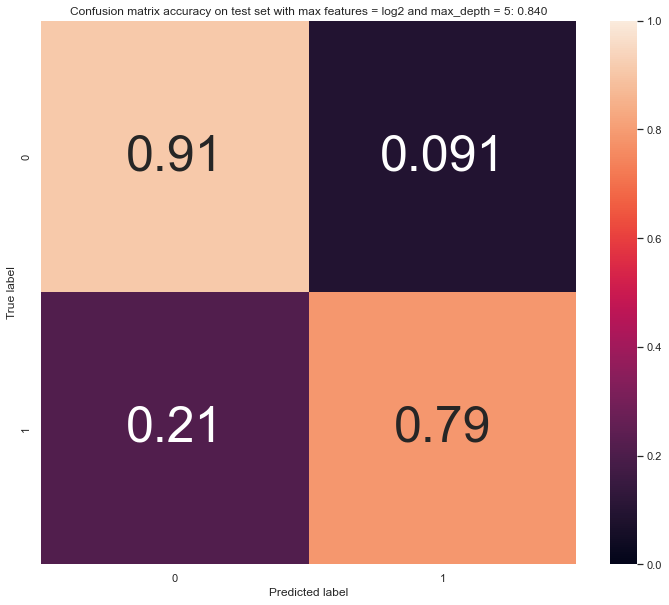

In [21]:
from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

# SVM

In [22]:
df=pd.DataFrame(data=images_sift)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']


#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Classification accuracy on test set with kernel = linear and gamma = 0.1: 0.960
Classification accuracy on test set with kernel = linear and gamma = 0.01: 0.960
Classification accuracy on test set with kernel = linear and gamma = 0.001: 0.960
Classification accuracy on test set with kernel = linear and gamma = 0.0001: 0.960
Classification accuracy on test set with kernel = linear and gamma = 0.11: 0.960
Classification accuracy on test set with kernel = poly and gamma = 0.1: 0.960
Classification accuracy on test set with kernel = poly and gamma = 0.01: 0.960
Classification accuracy on test set with kernel = poly and gamma = 0.001: 0.960
Classification accuracy on test set with kernel = poly and gamma = 0.0001: 0.960
Classification accuracy on test set with kernel = poly and gamma = 0.11: 0.960
Classification accuracy on test set with kernel = rbf and gamma = 0.1: 0.560
Classification accuracy on test set with kernel = rbf and gamma = 0.01: 0.560
Classification accuracy on test set with 

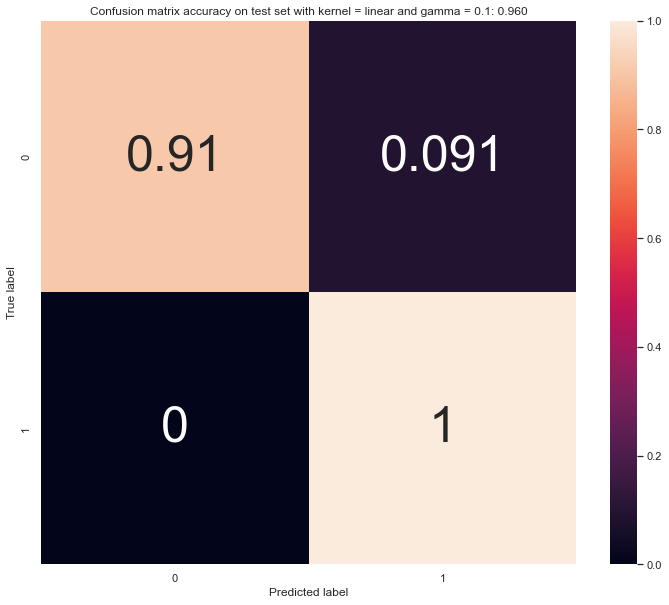

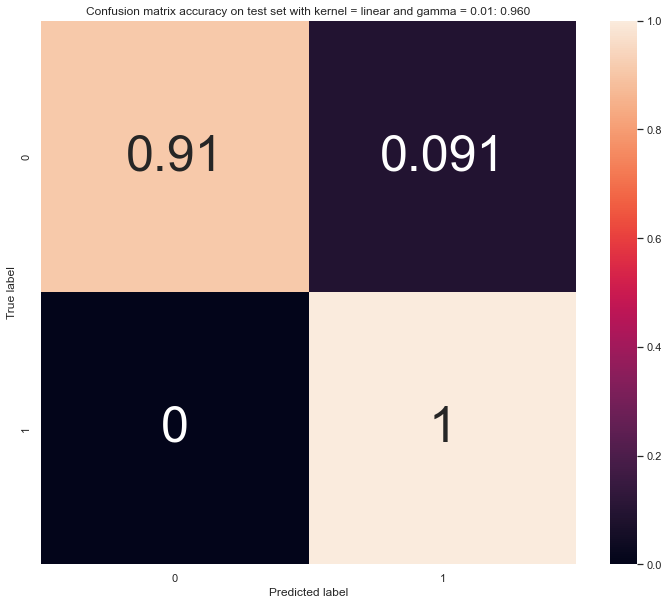

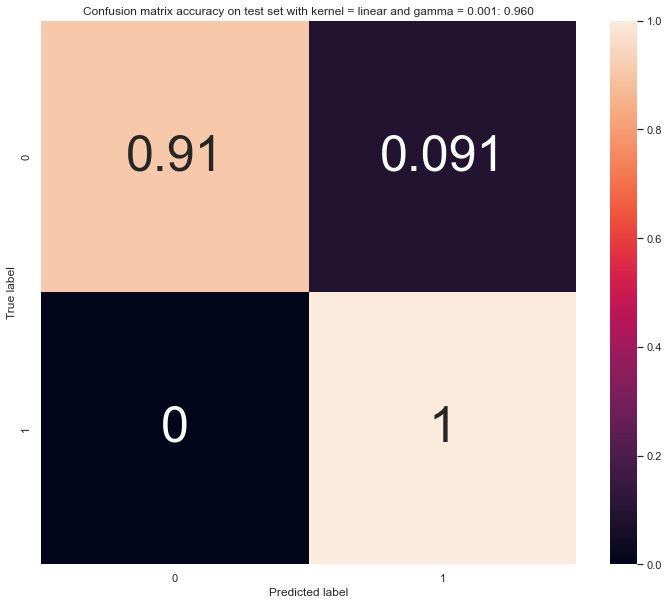

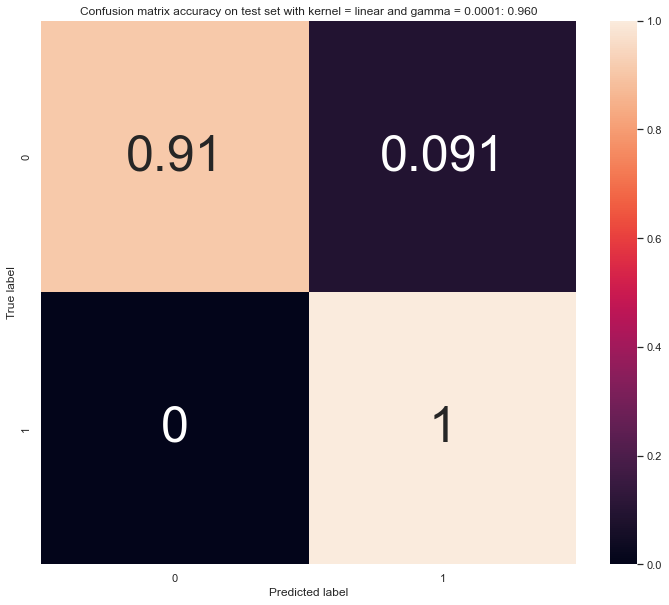

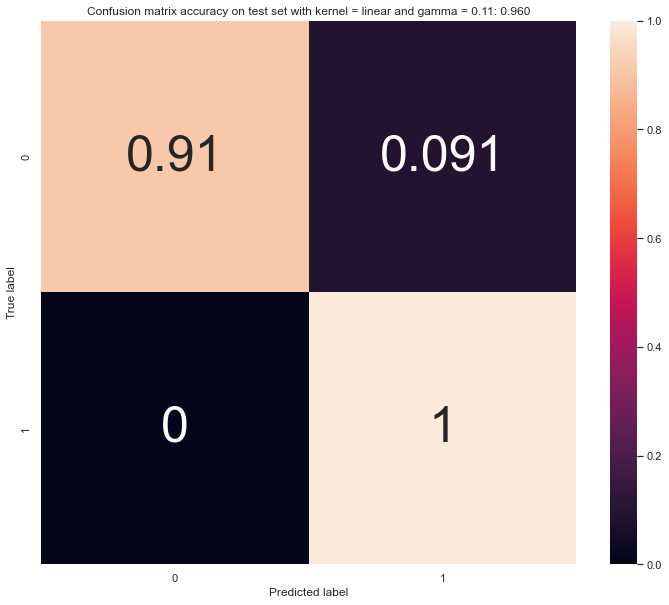

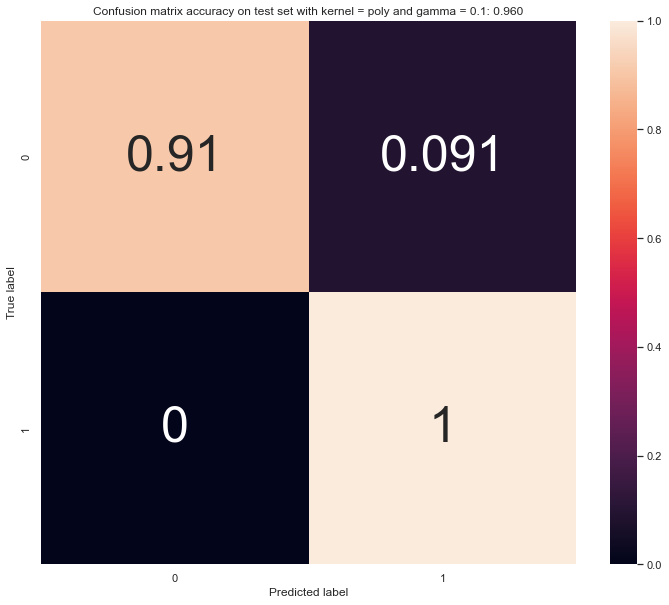

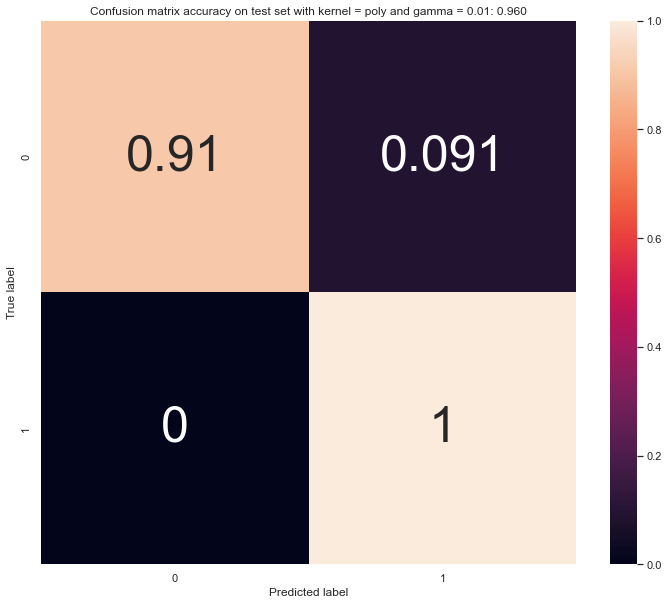

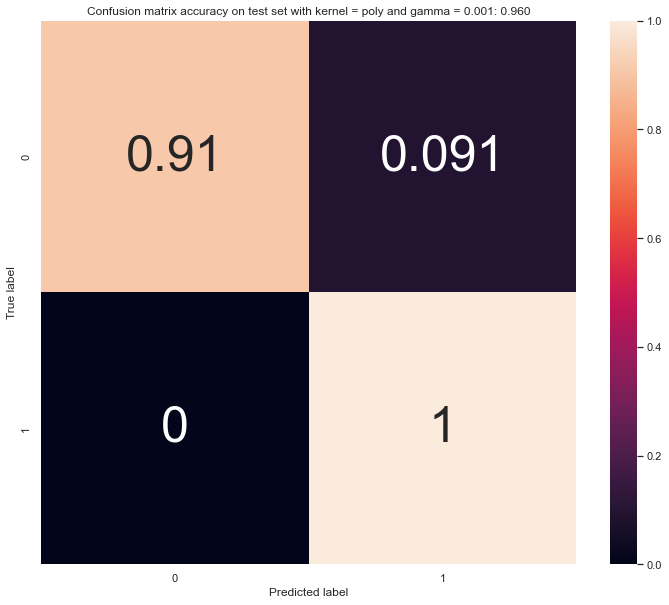

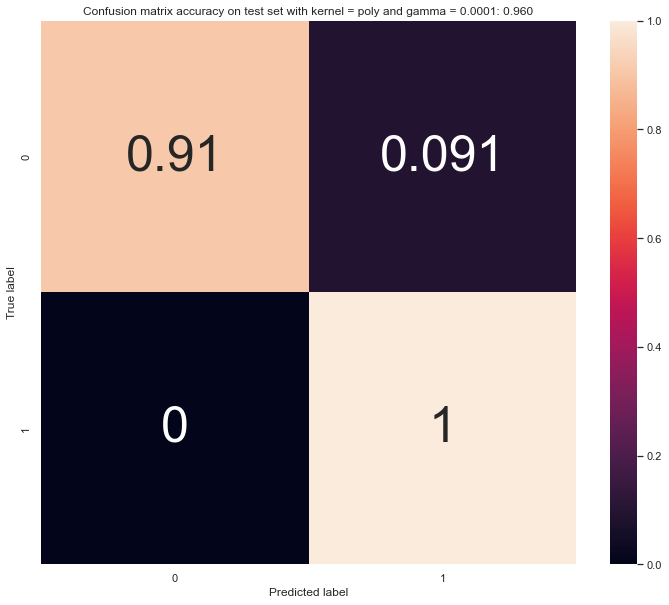

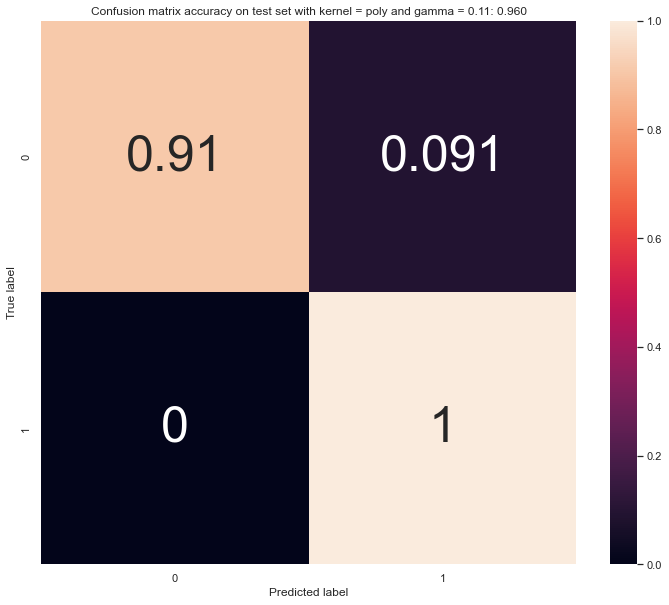

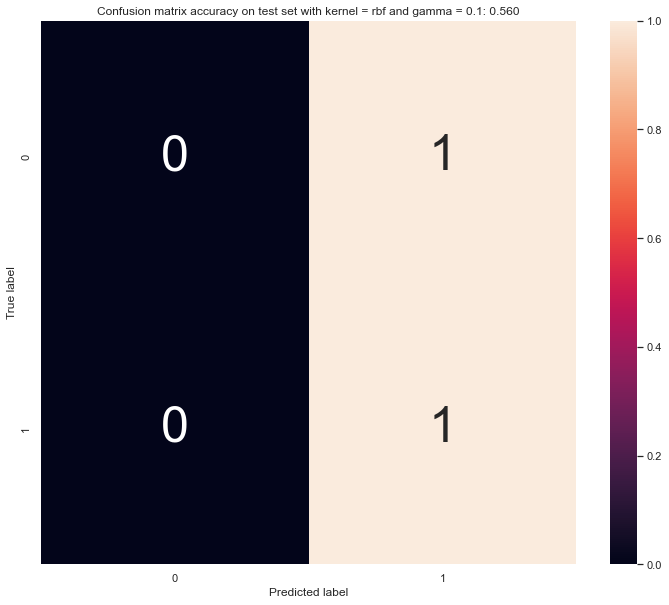

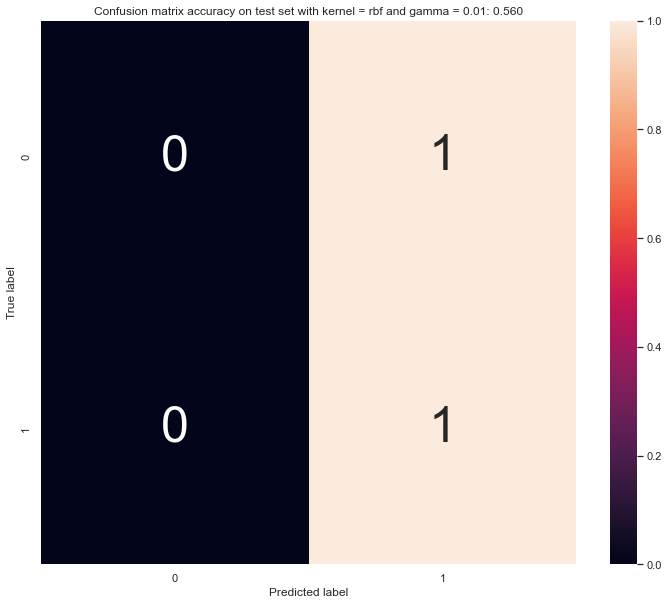

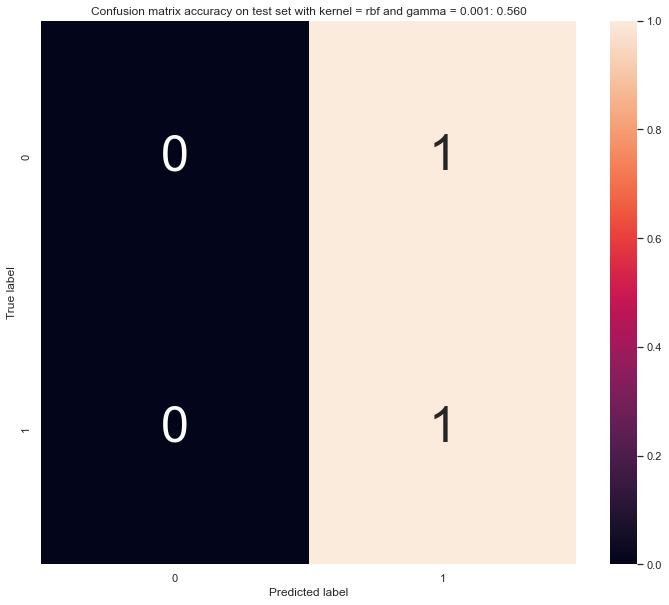

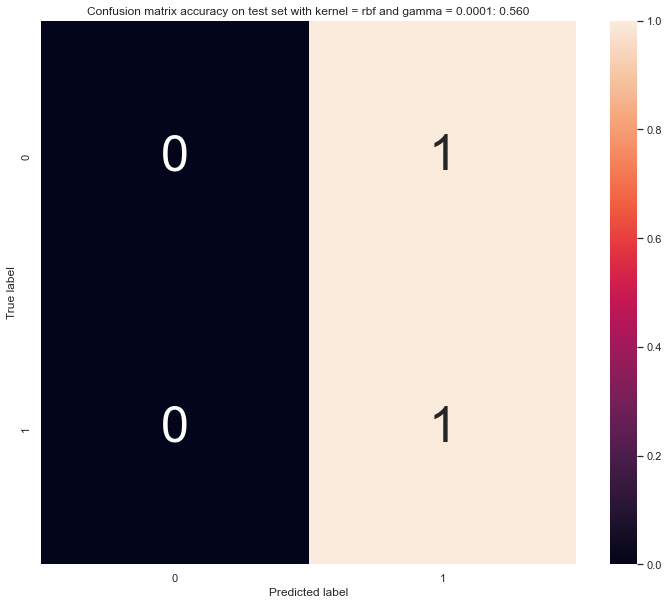

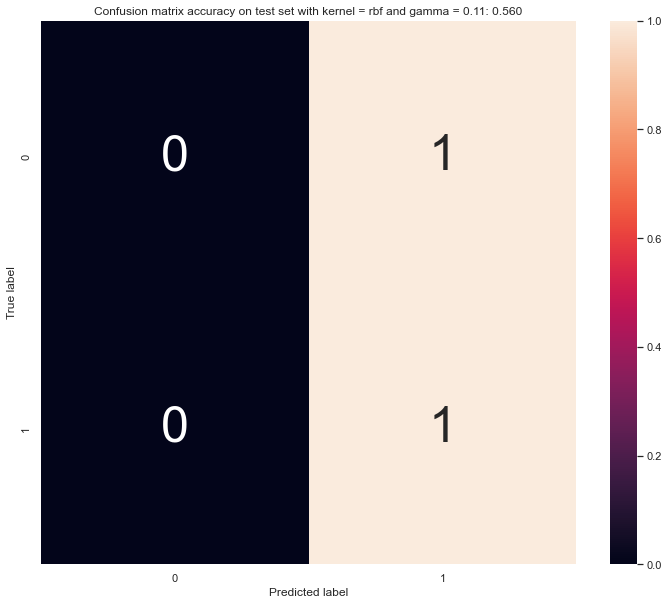

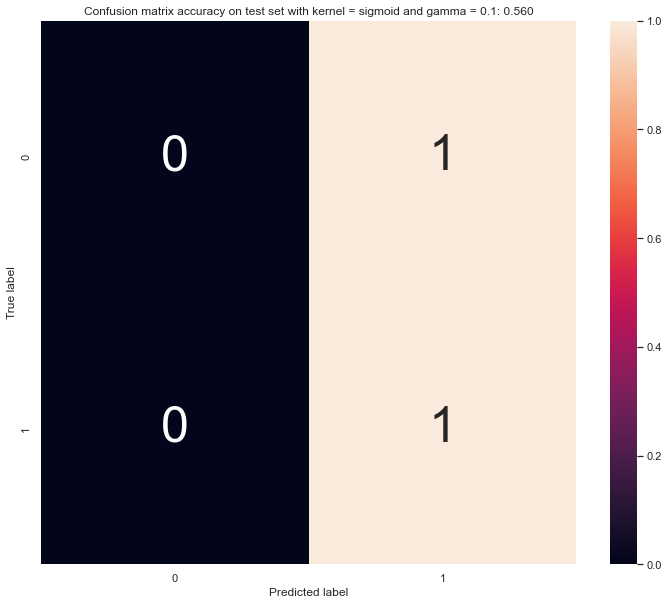

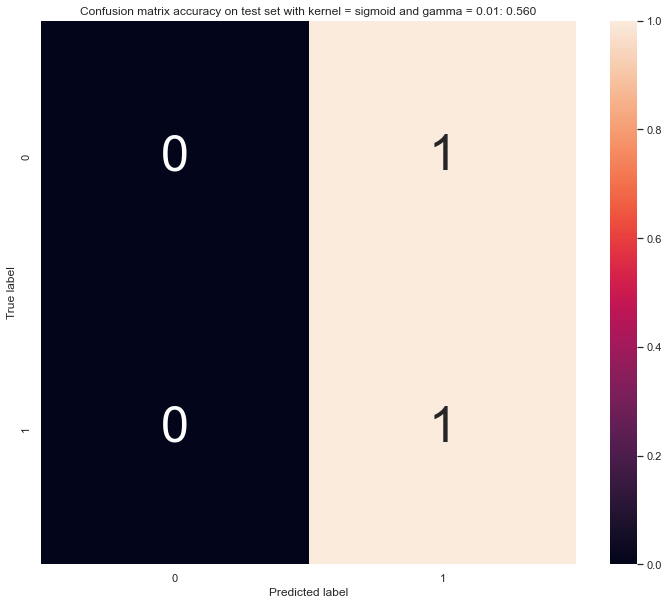

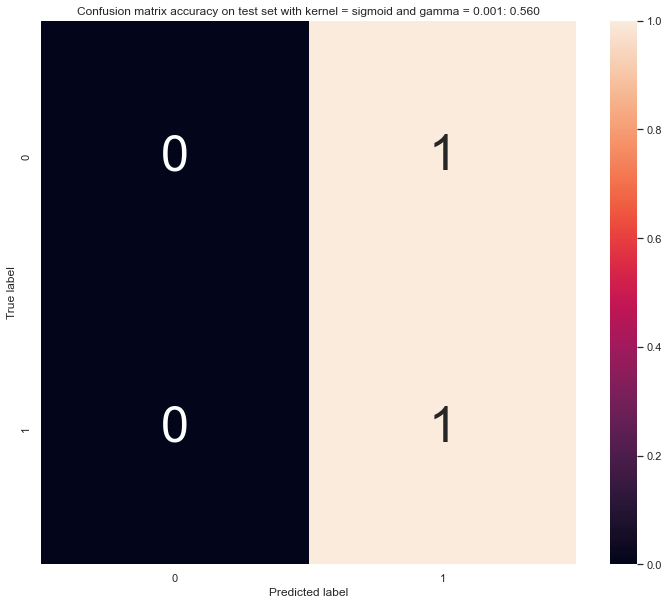

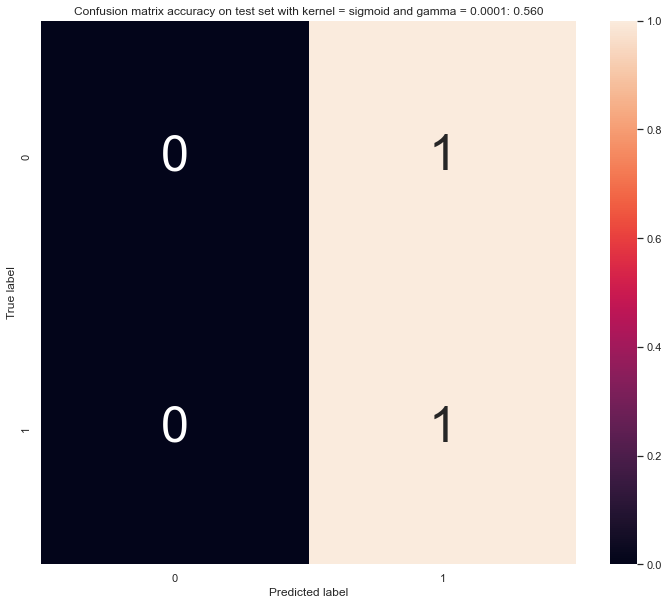

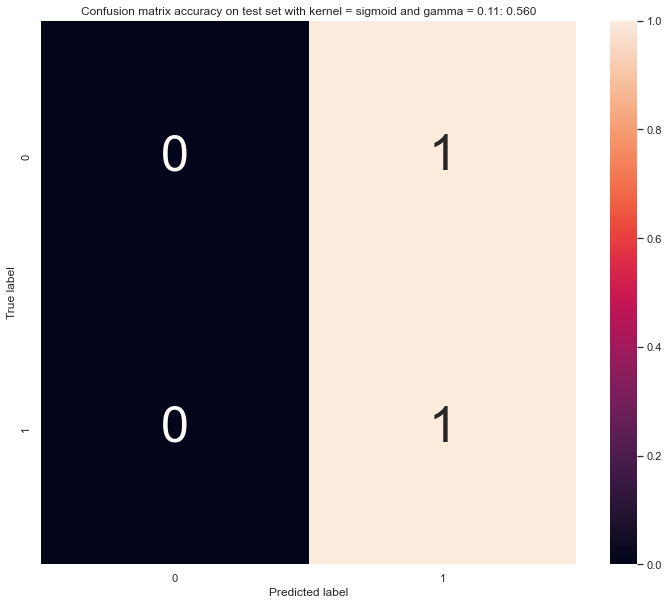

In [23]:
from itertools import product
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = [0.1,0.01,0.001,0.00010,0.11]
for k,g in product(kernel,gamma): # with product we can iterate through all possible combinations
    svM = svm.SVC(kernel=k,
                  gamma=g)
    svM.fit(X_train, y_train)
    prediction_test = svM.predict(X=X_test)
    print('Classification accuracy on test set with kernel = {} and gamma = {}: {:.3f}'.format(k, g, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with kernel = {} and gamma = {}: {:.3f}'.format(k, g, accuracy_score(y_test,prediction_test)))

In [24]:
df=pd.DataFrame(data=glcm)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']


#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Classification accuracy on test set with kernel = linear and gamma = 0.1: 0.840
Classification accuracy on test set with kernel = linear and gamma = 0.01: 0.840
Classification accuracy on test set with kernel = linear and gamma = 0.001: 0.840
Classification accuracy on test set with kernel = linear and gamma = 0.0001: 0.840
Classification accuracy on test set with kernel = linear and gamma = 0.11: 0.840
Classification accuracy on test set with kernel = poly and gamma = 0.1: 0.800
Classification accuracy on test set with kernel = poly and gamma = 0.01: 0.760
Classification accuracy on test set with kernel = poly and gamma = 0.001: 0.840
Classification accuracy on test set with kernel = poly and gamma = 0.0001: 0.680
Classification accuracy on test set with kernel = poly and gamma = 0.11: 0.720
Classification accuracy on test set with kernel = rbf and gamma = 0.1: 0.760
Classification accuracy on test set with kernel = rbf and gamma = 0.01: 0.720
Classification accuracy on test set with 

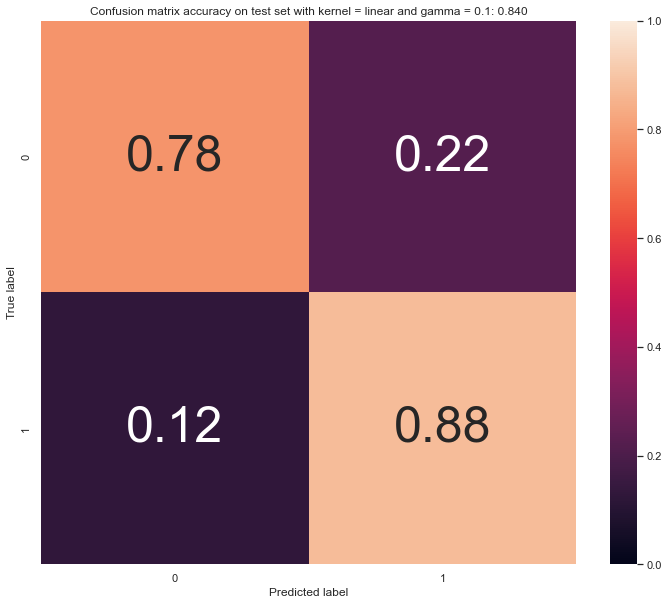

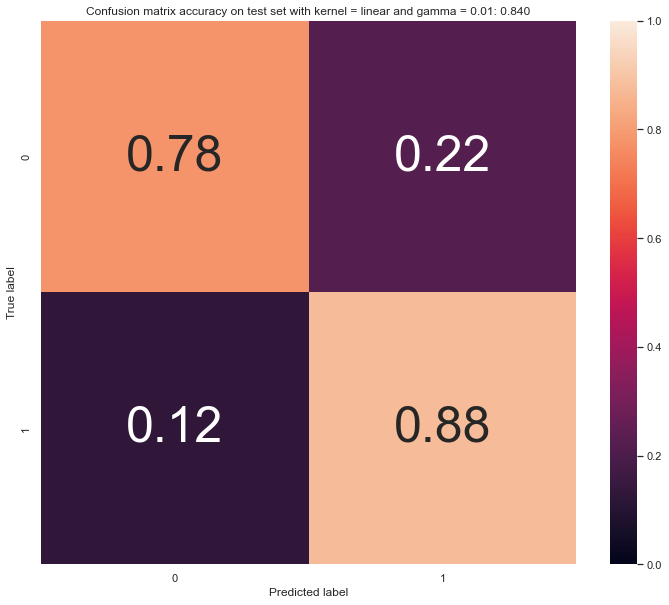

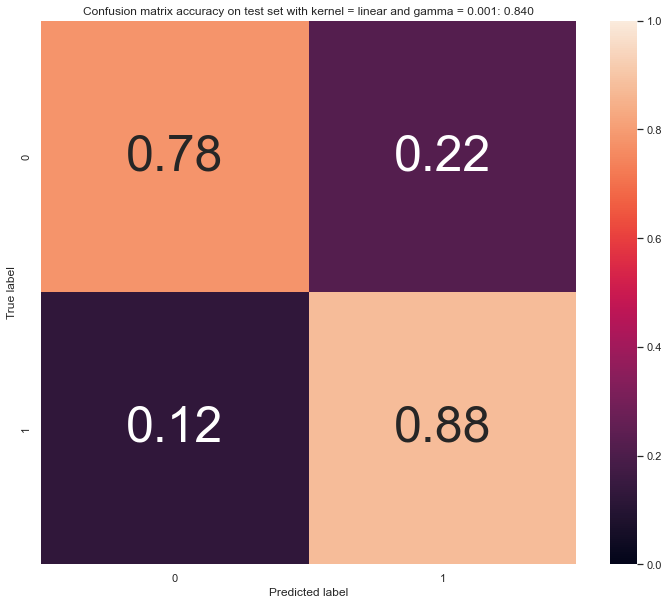

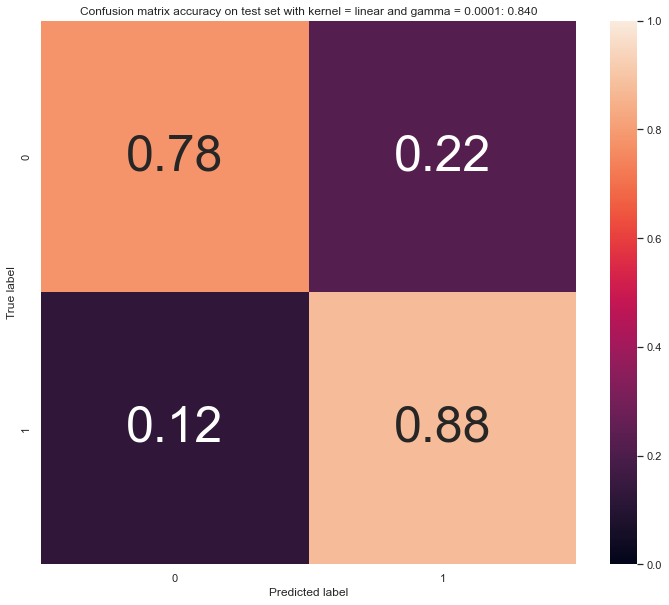

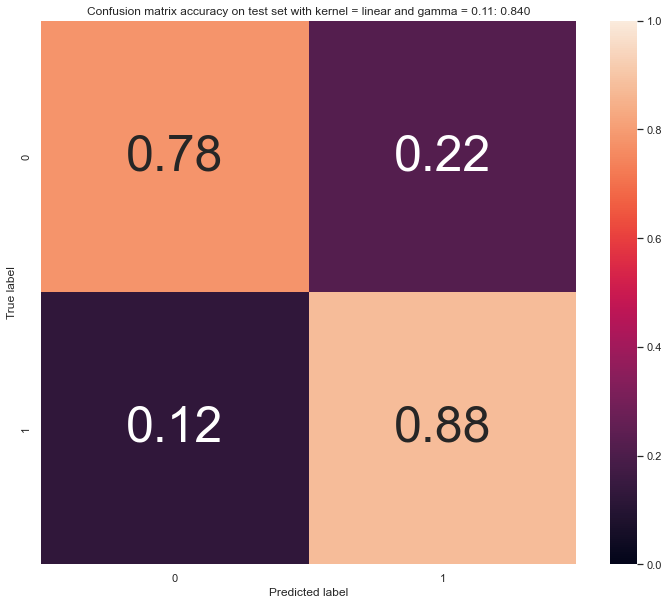

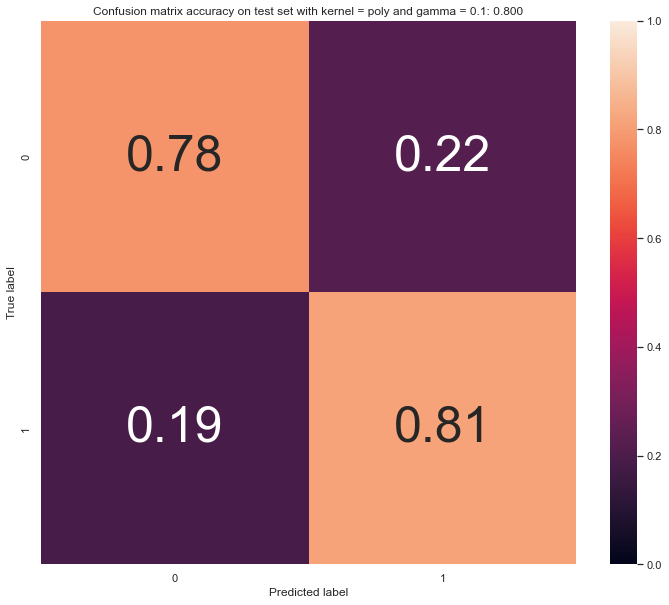

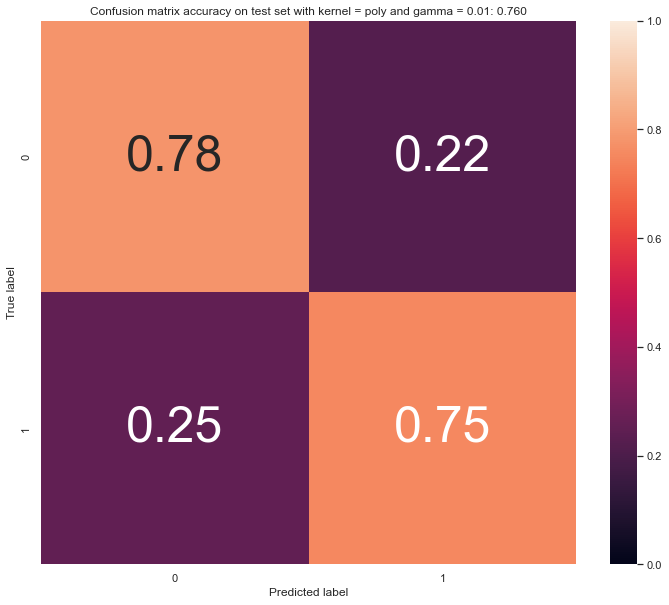

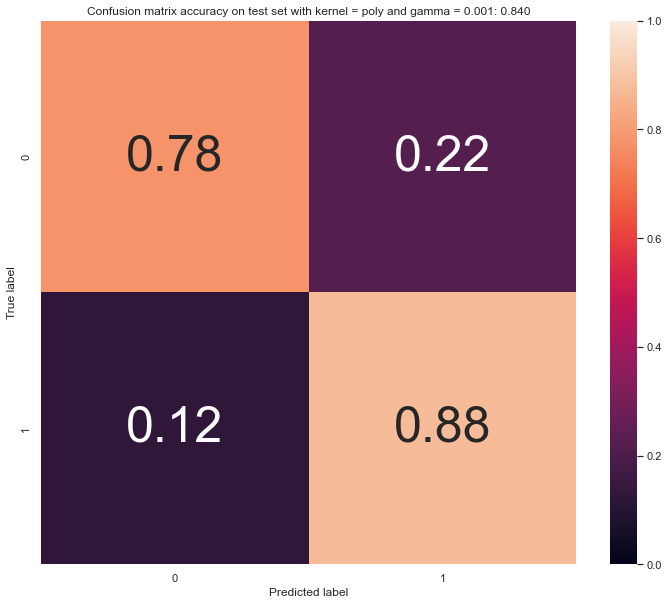

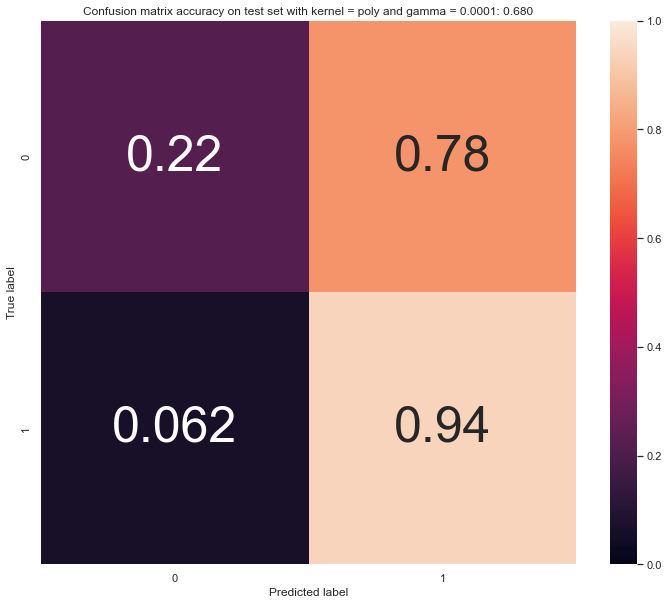

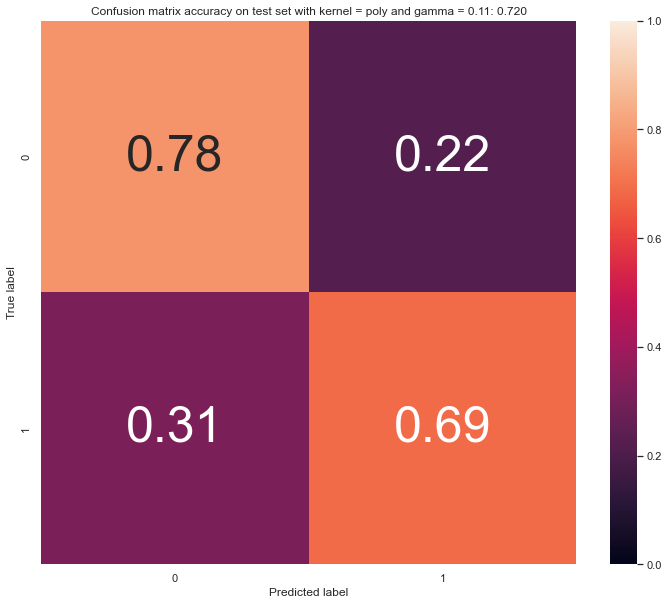

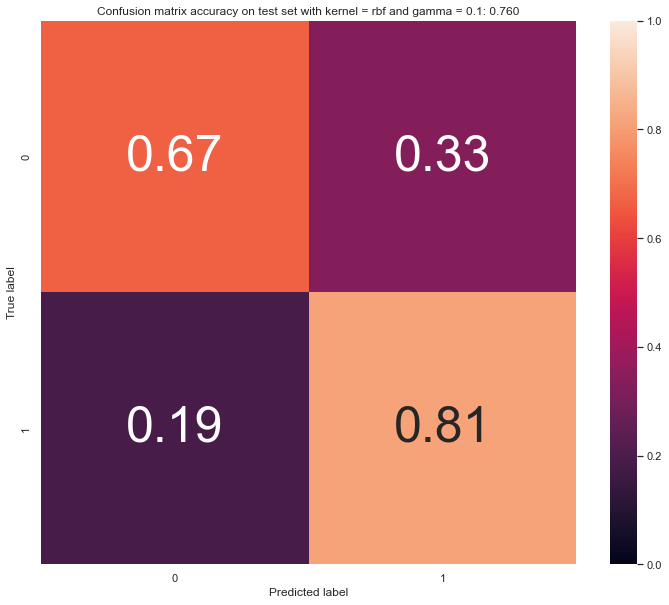

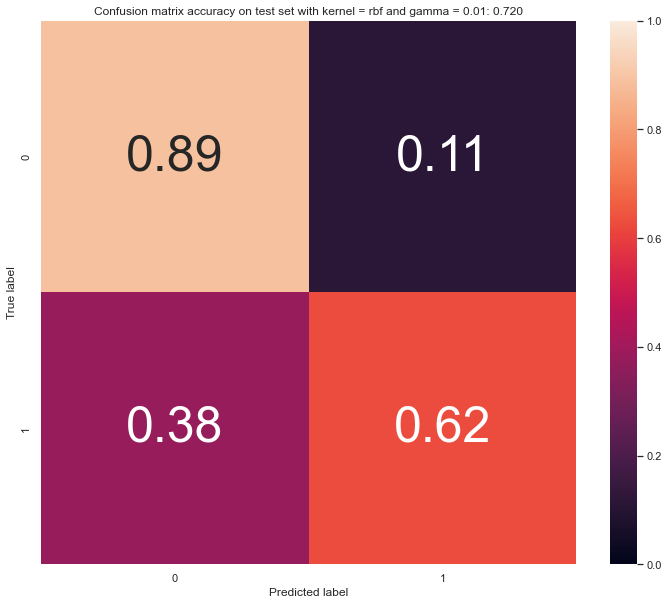

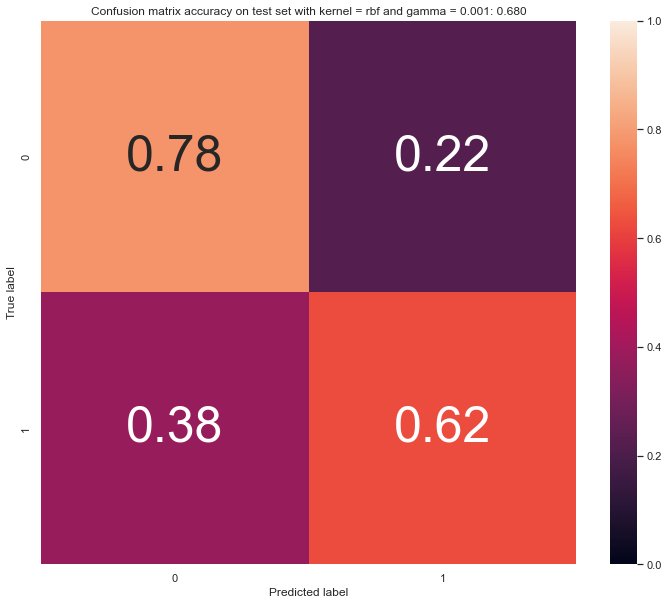

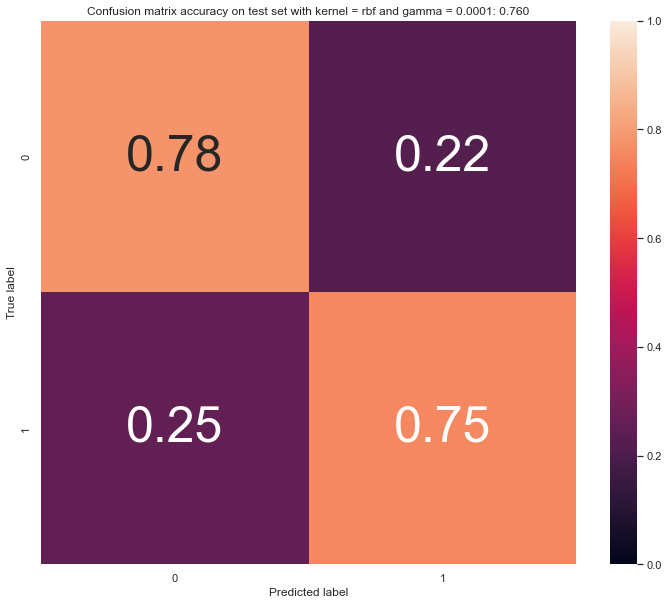

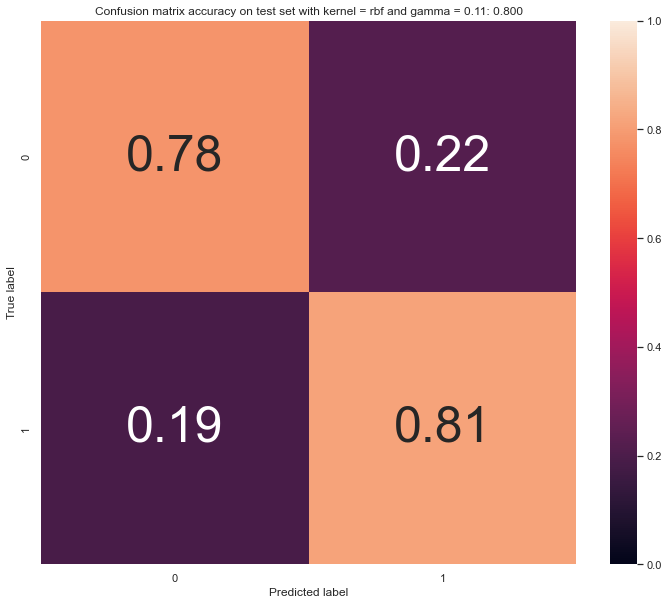

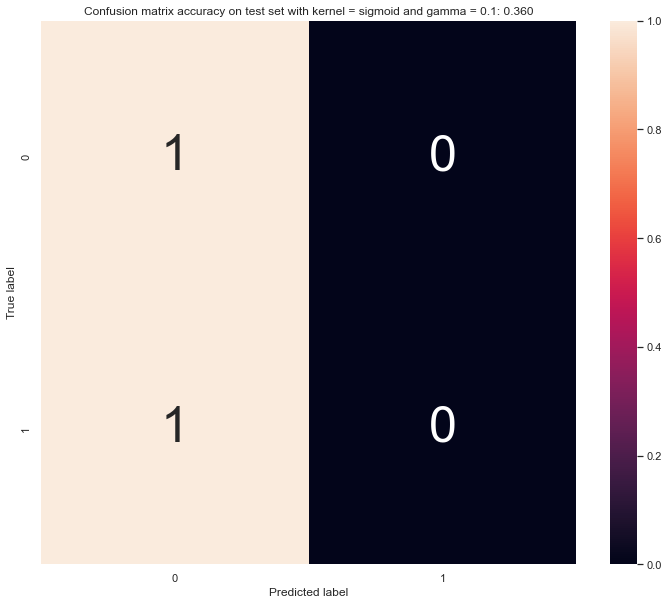

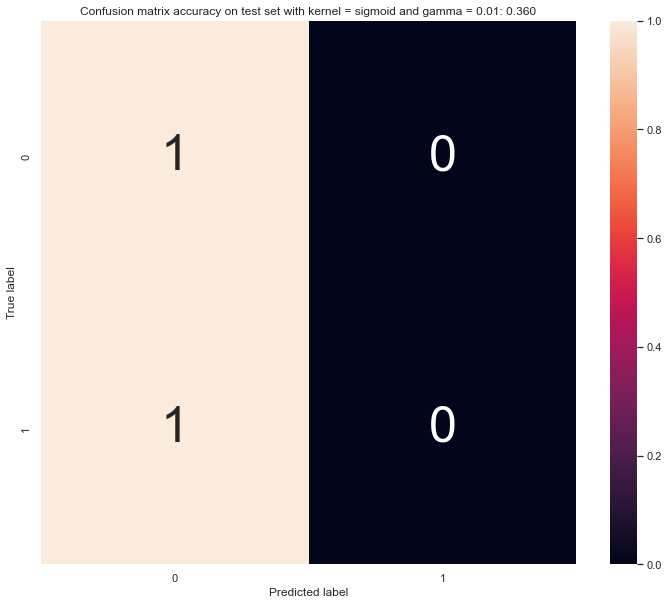

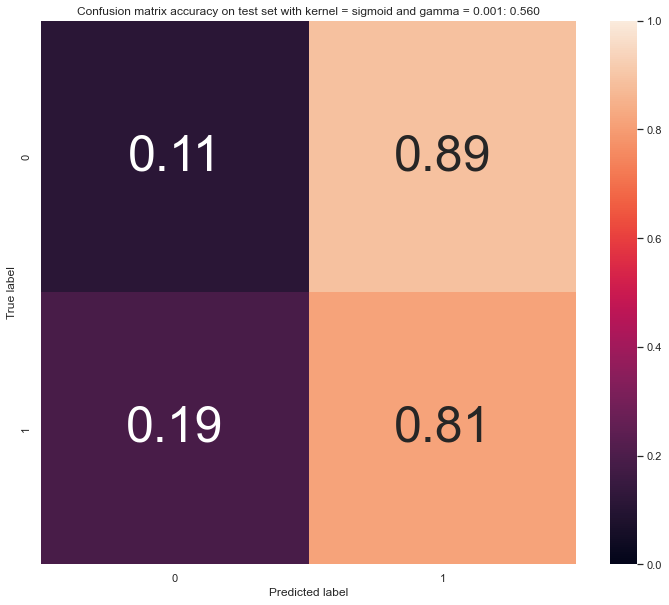

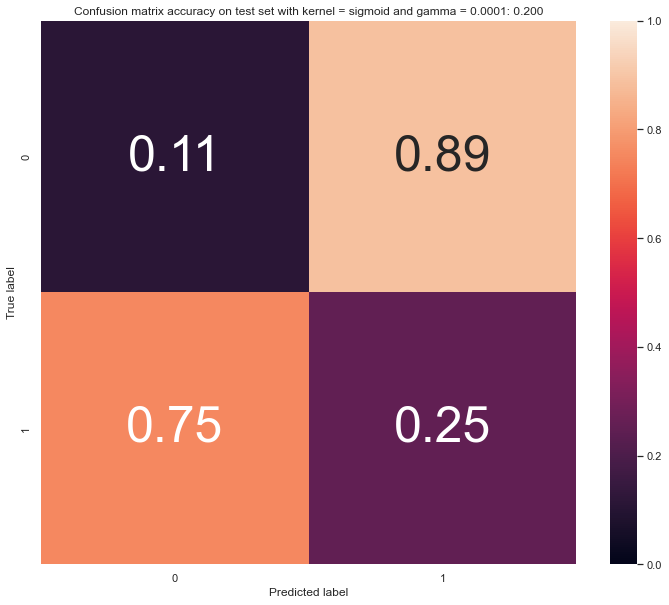

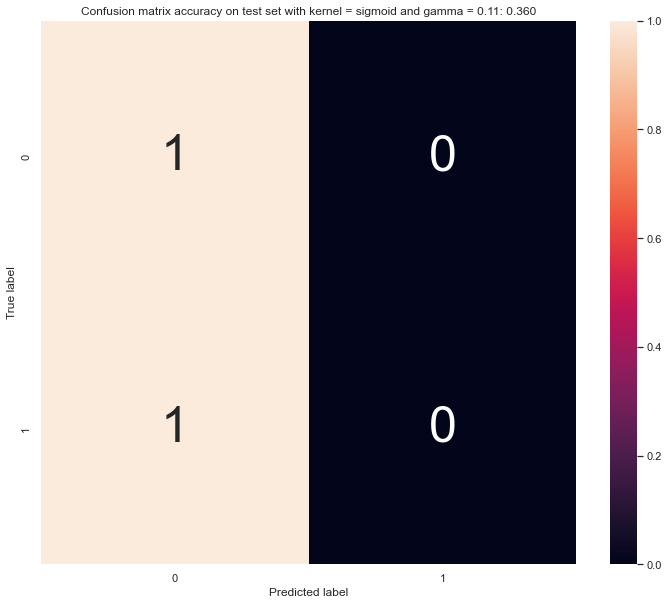

In [25]:
from itertools import product
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = [0.1,0.01,0.001,0.00010,0.11]
for k,g in product(kernel,gamma): # with product we can iterate through all possible combinations
    svM = svm.SVC(kernel=k,
                  gamma=g)
    svM.fit(X_train, y_train)
    prediction_test = svM.predict(X=X_test)
    print('Classification accuracy on test set with kernel = {} and gamma = {}: {:.3f}'.format(k, g, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with kernel = {} and gamma = {}: {:.3f}'.format(k, g, accuracy_score(y_test,prediction_test)))

In [26]:
df=pd.DataFrame(data=images_sift_glcm)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']


#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Classification accuracy on test set with kernel = linear and gamma = 0.1: 0.880
Classification accuracy on test set with kernel = linear and gamma = 0.01: 0.880
Classification accuracy on test set with kernel = linear and gamma = 0.001: 0.880
Classification accuracy on test set with kernel = linear and gamma = 0.0001: 0.880
Classification accuracy on test set with kernel = linear and gamma = 0.11: 0.880
Classification accuracy on test set with kernel = poly and gamma = 0.1: 0.880
Classification accuracy on test set with kernel = poly and gamma = 0.01: 0.880
Classification accuracy on test set with kernel = poly and gamma = 0.001: 0.880
Classification accuracy on test set with kernel = poly and gamma = 0.0001: 0.880
Classification accuracy on test set with kernel = poly and gamma = 0.11: 0.880
Classification accuracy on test set with kernel = rbf and gamma = 0.1: 0.480
Classification accuracy on test set with kernel = rbf and gamma = 0.01: 0.480
Classification accuracy on test set with 

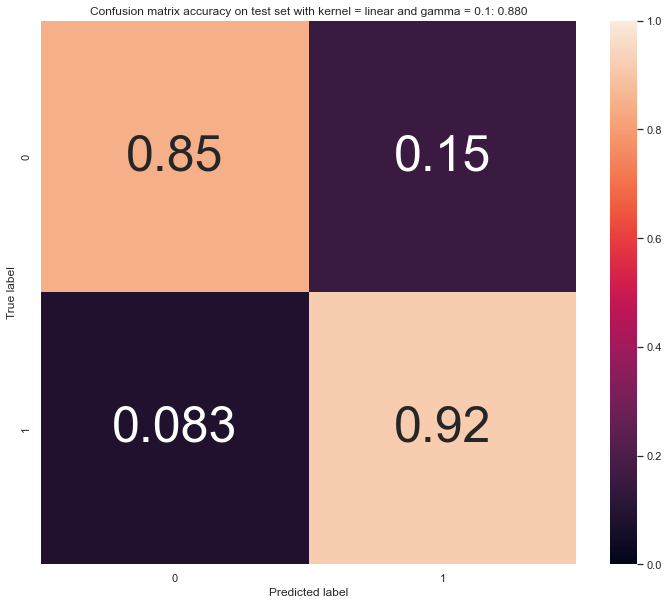

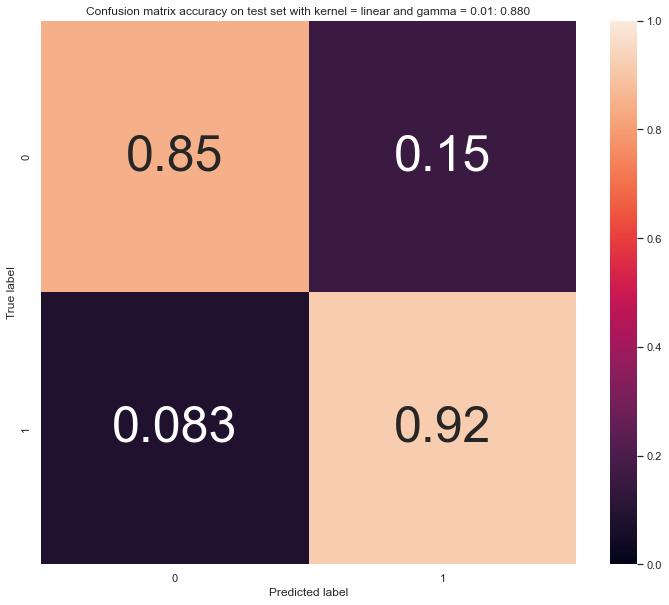

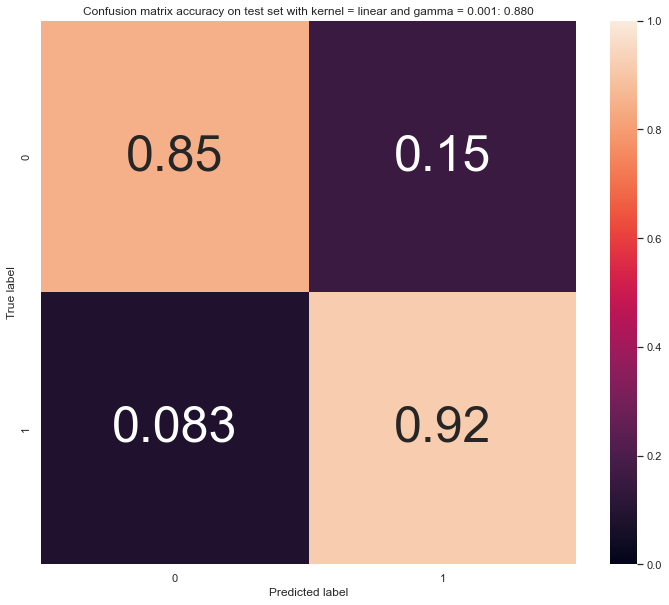

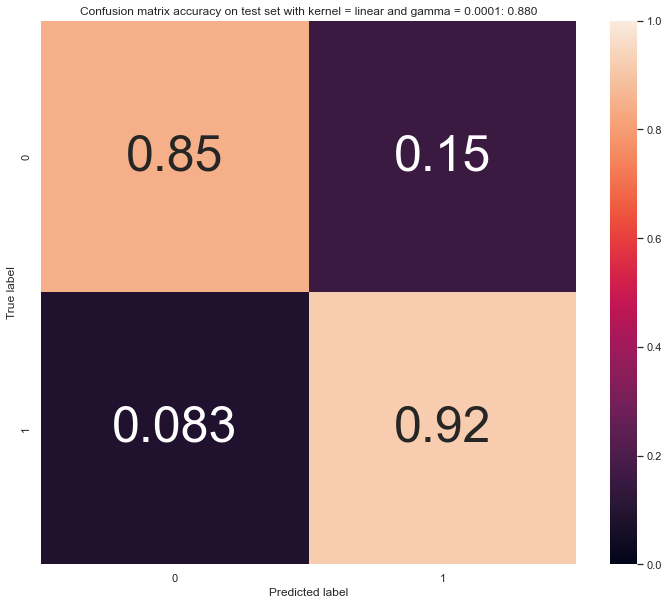

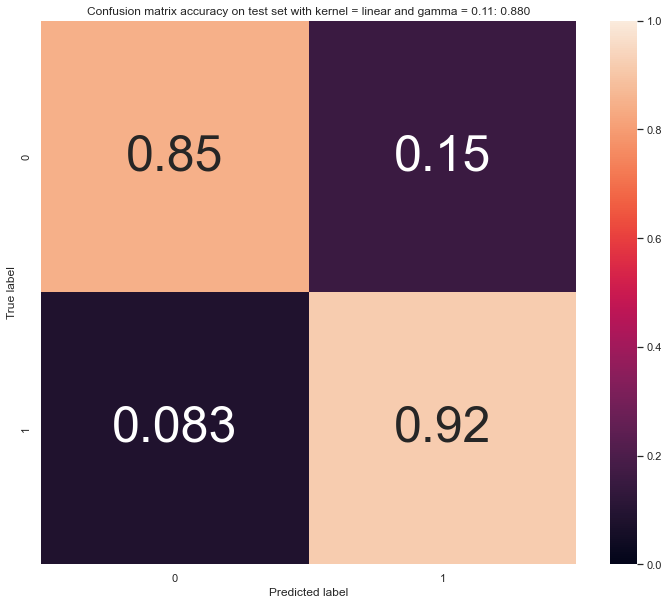

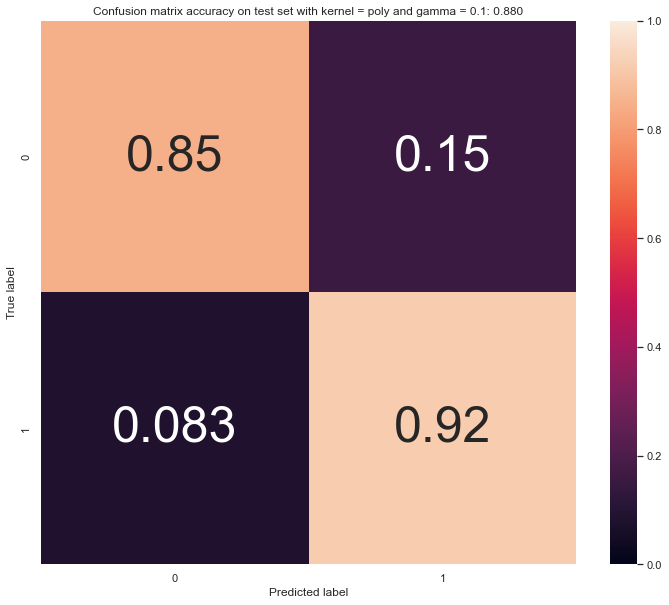

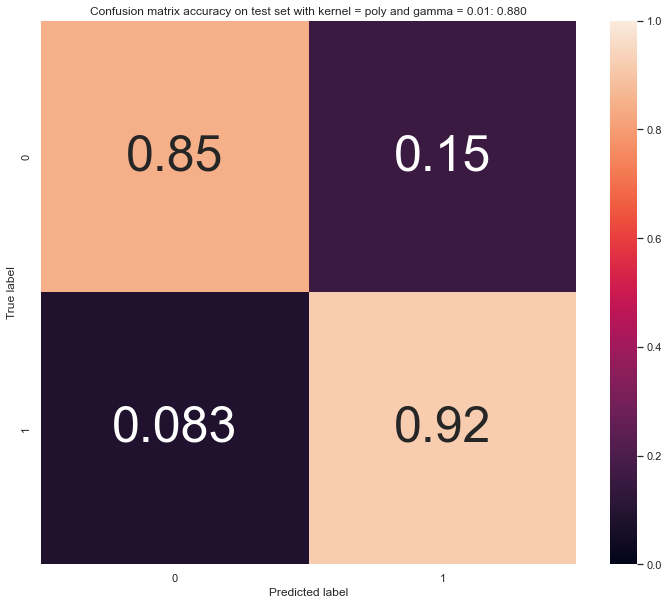

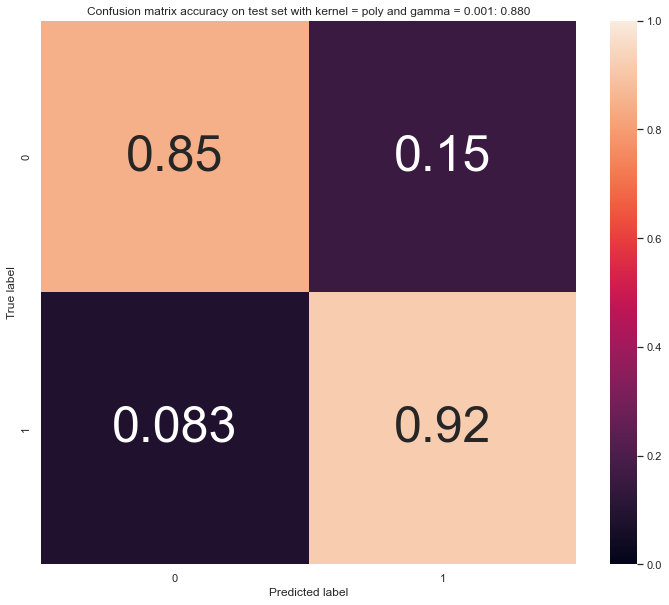

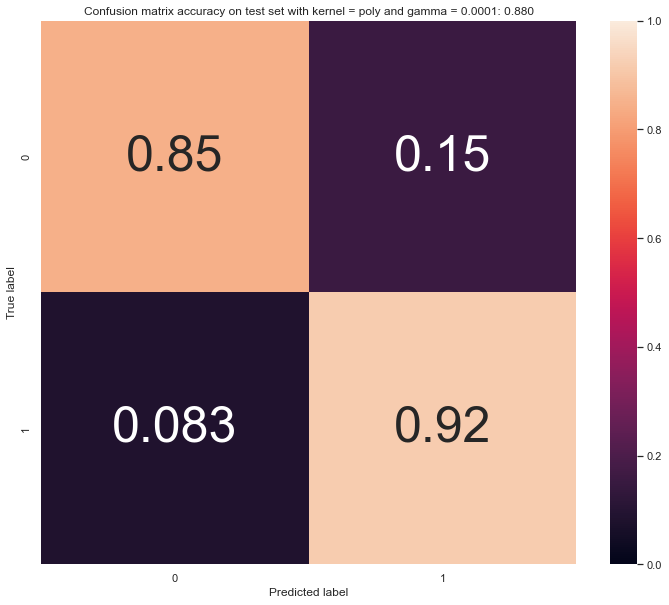

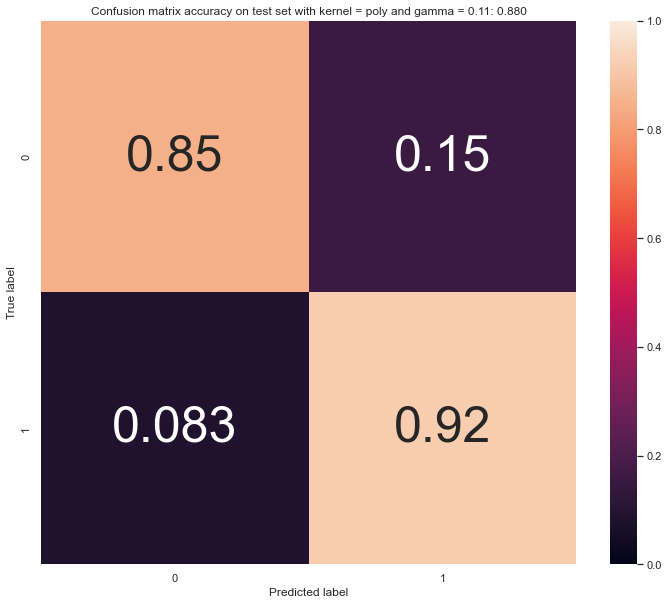

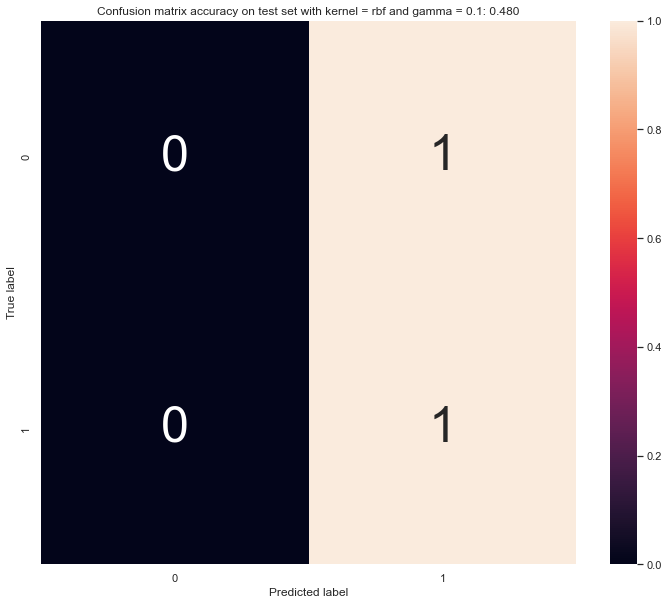

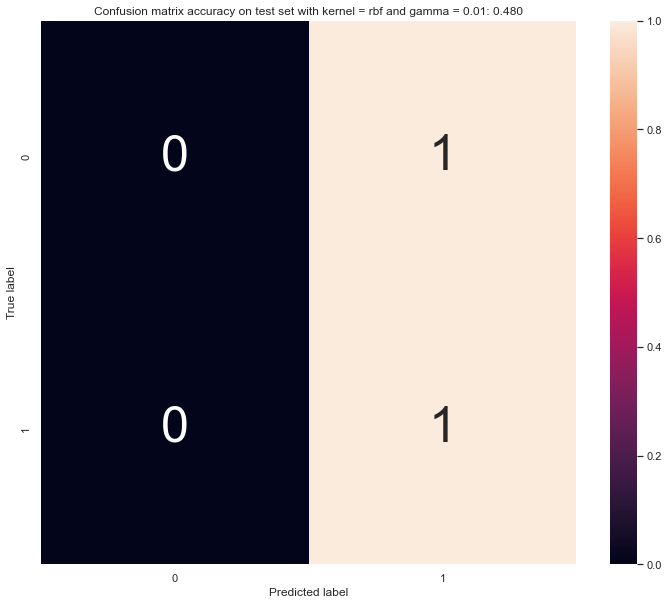

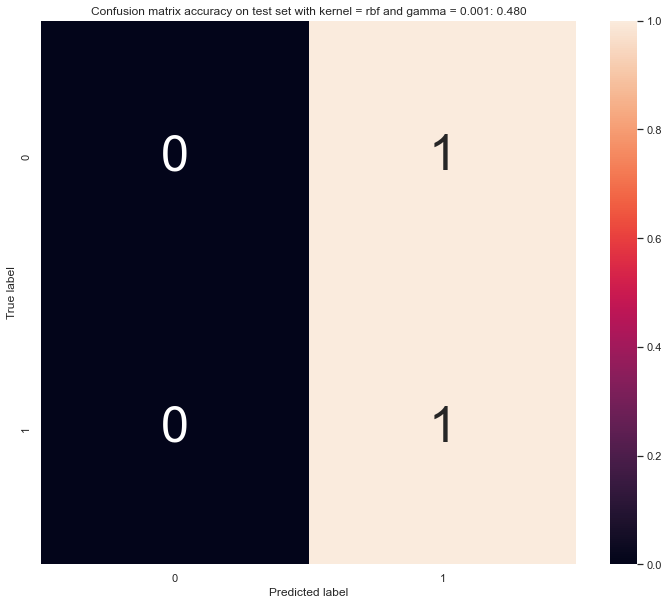

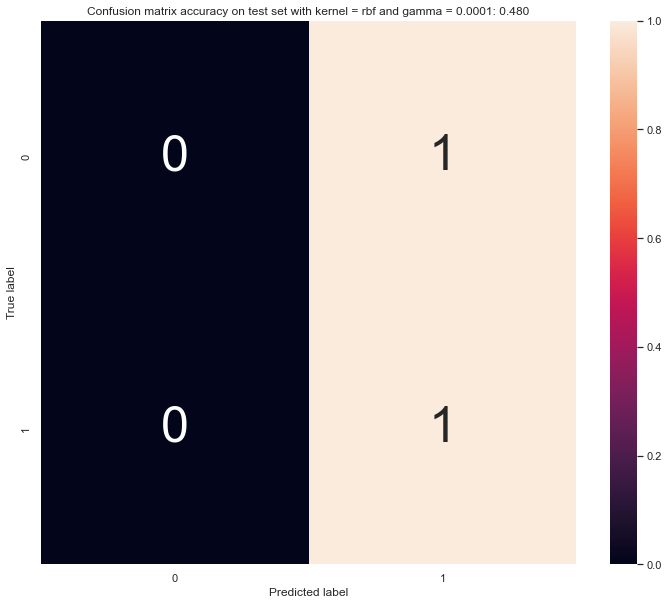

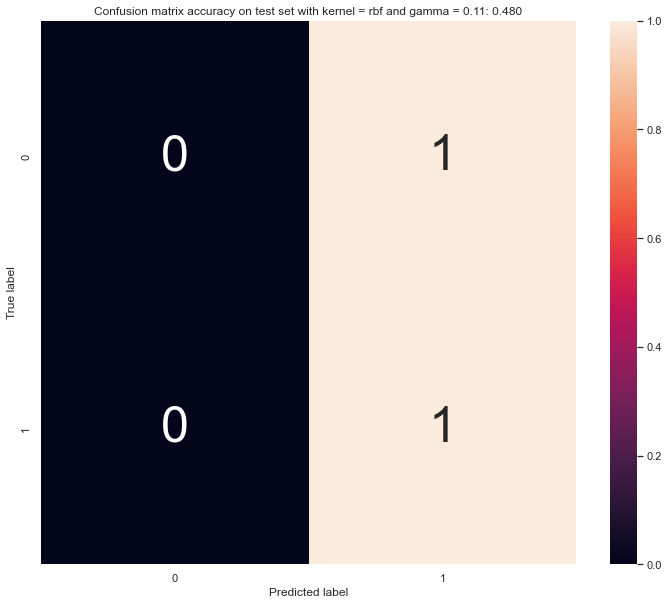

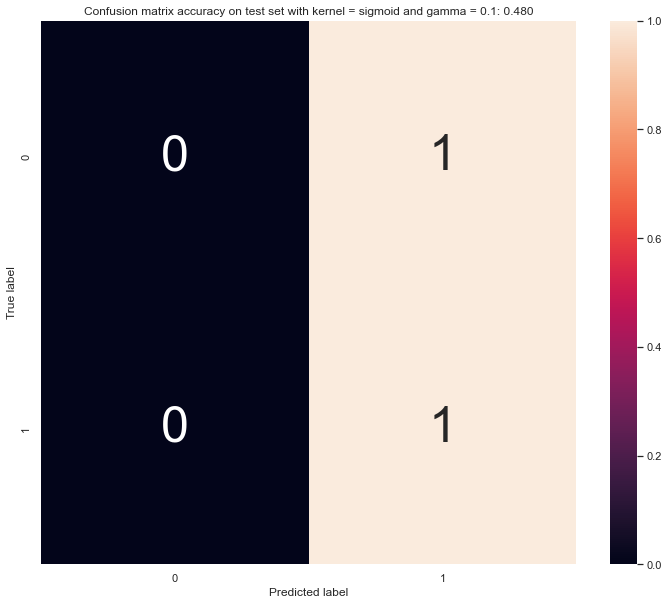

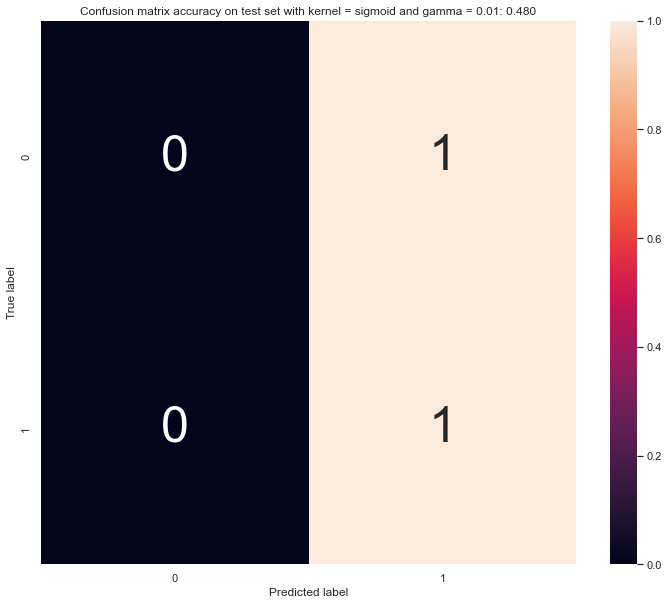

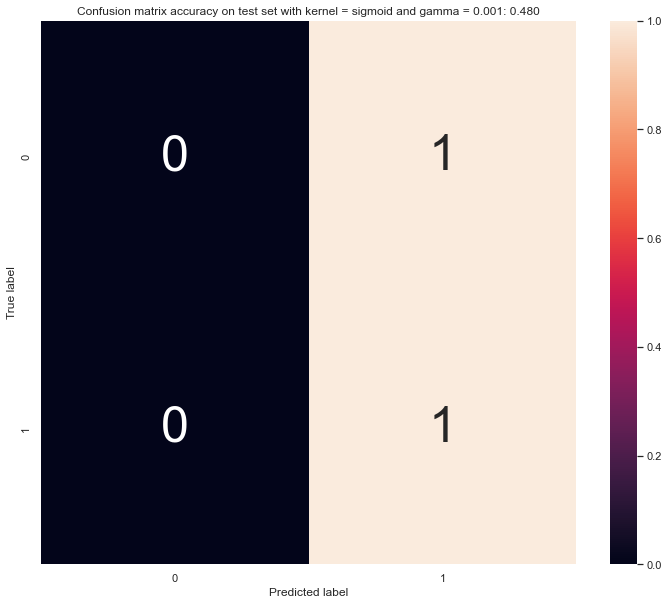

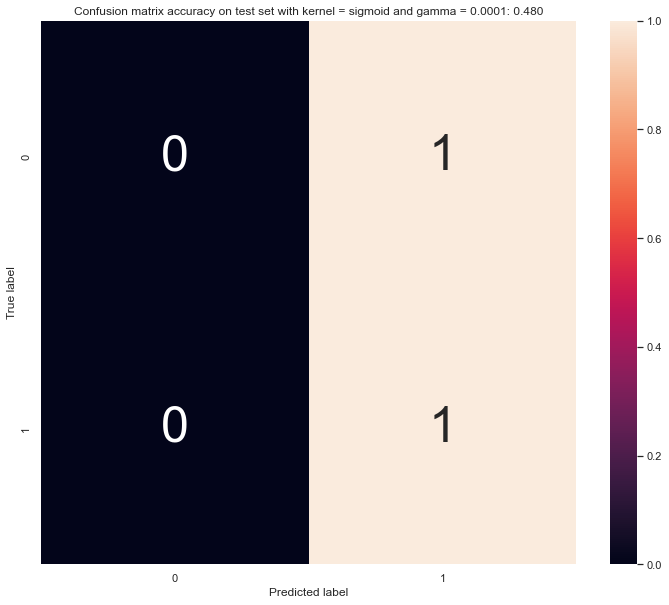

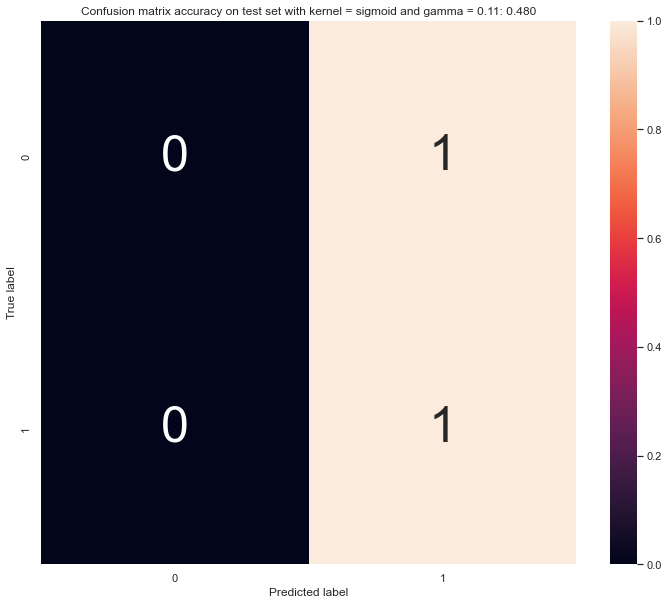

In [27]:
from itertools import product
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = [0.1,0.01,0.001,0.00010,0.11]
for k,g in product(kernel,gamma): # with product we can iterate through all possible combinations
    svM = svm.SVC(kernel=k,
                  gamma=g)
    svM.fit(X_train, y_train)
    prediction_test = svM.predict(X=X_test)
    print('Classification accuracy on test set with kernel = {} and gamma = {}: {:.3f}'.format(k, g, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with kernel = {} and gamma = {}: {:.3f}'.format(k, g, accuracy_score(y_test,prediction_test)))

# KNN

In [28]:
df=pd.DataFrame(data=images_sift)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']


#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Classification accuracy on test set with n = 12: 0.520
Classification accuracy on test set with n = 3: 0.640
Classification accuracy on test set with n = 4: 0.760
Classification accuracy on test set with n = 5: 0.520
Classification accuracy on test set with n = 6: 0.520
Classification accuracy on test set with n = 7: 0.520
Classification accuracy on test set with n = 8: 0.520


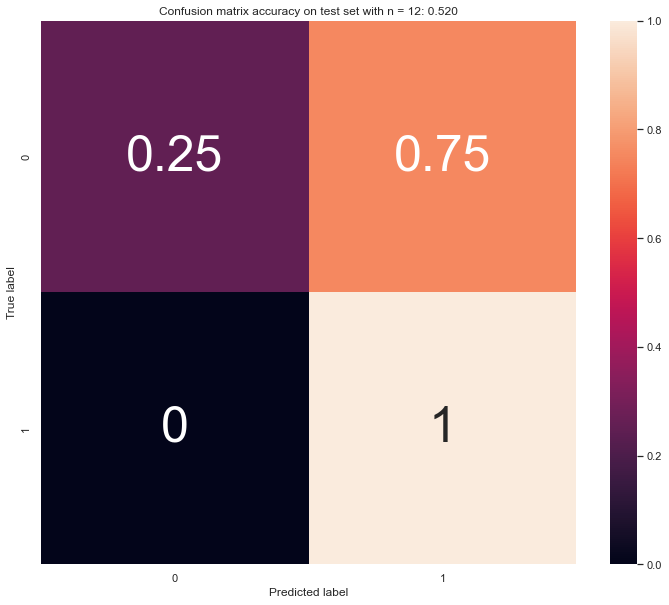

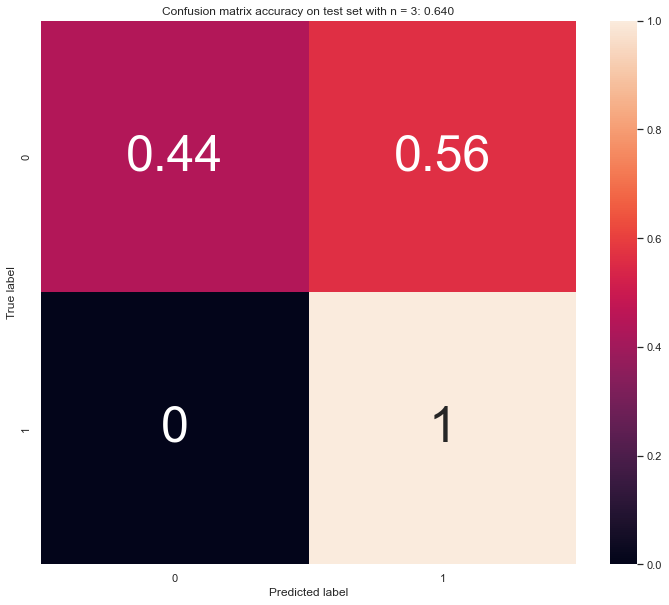

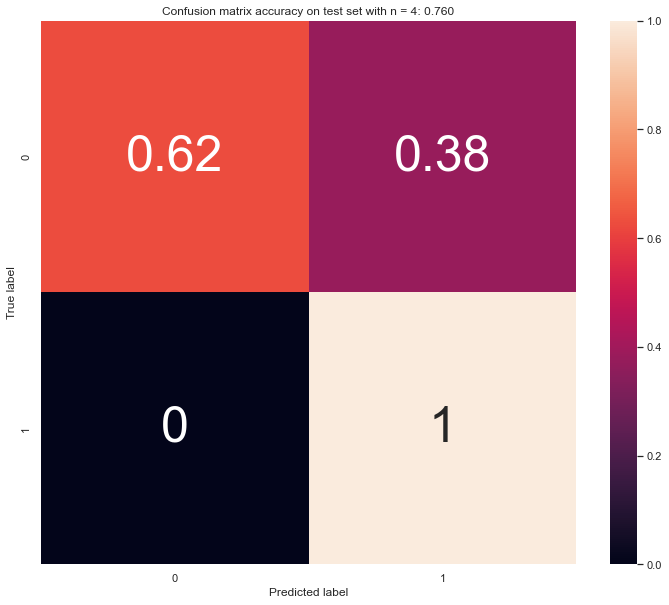

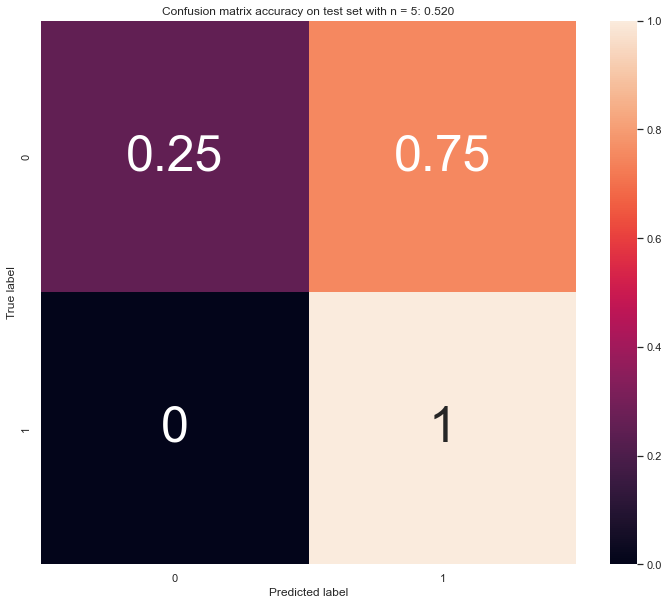

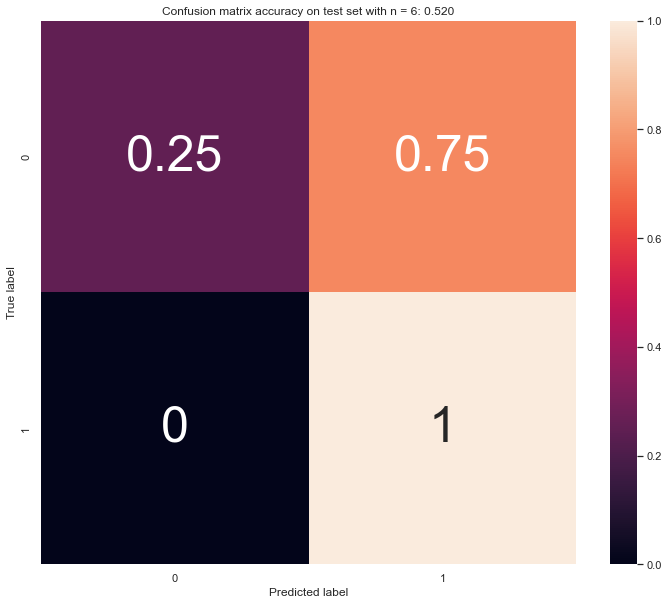

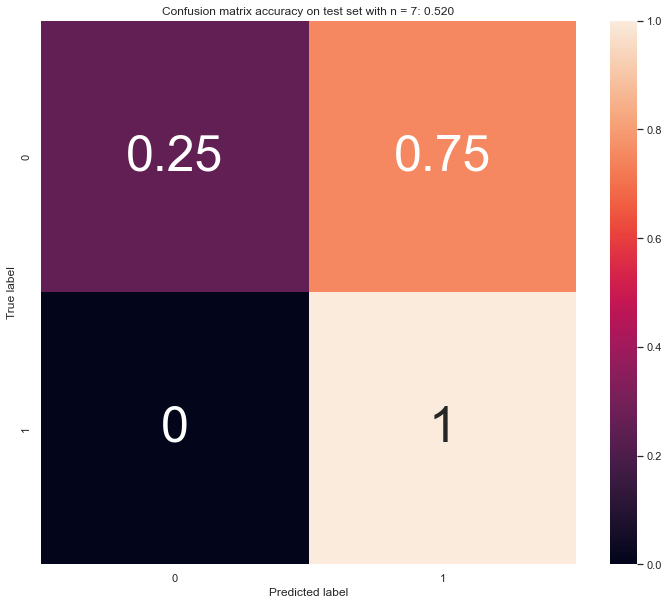

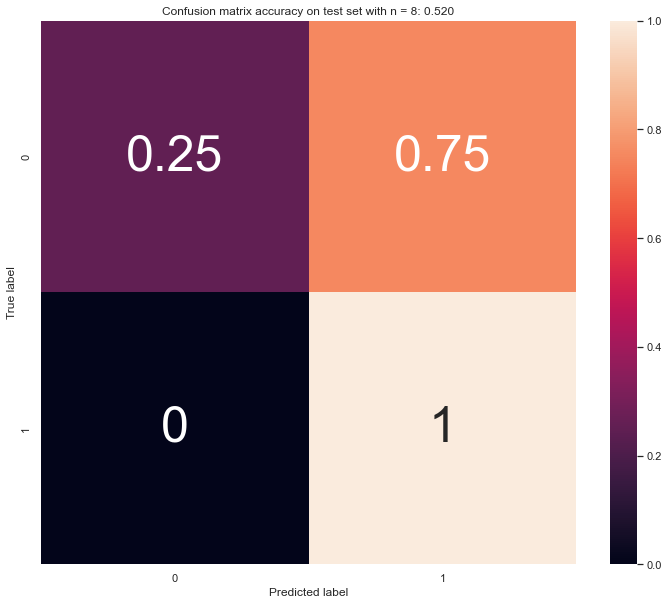

In [29]:
from itertools import product
n = [12,3,4,5,6,7,8]
for no in (n): # with product we can iterate through all possible combinations
    knn= KNeighborsClassifier(n_neighbors=no,
                              metric='minkowski', 
                              p=2)
    knn.fit(X_train, y_train)
    prediction_test = knn.predict(X=X_test)
    print('Classification accuracy on test set with n = {}: {:.3f}'.format(no, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with n = {}: {:.3f}'.format(no, accuracy_score(y_test,prediction_test)))

In [30]:
df=pd.DataFrame(data=glcm)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']


#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Classification accuracy on test set with n = 2: 0.480
Classification accuracy on test set with n = 3: 0.600
Classification accuracy on test set with n = 4: 0.560
Classification accuracy on test set with n = 5: 0.640
Classification accuracy on test set with n = 6: 0.640
Classification accuracy on test set with n = 7: 0.760
Classification accuracy on test set with n = 8: 0.720


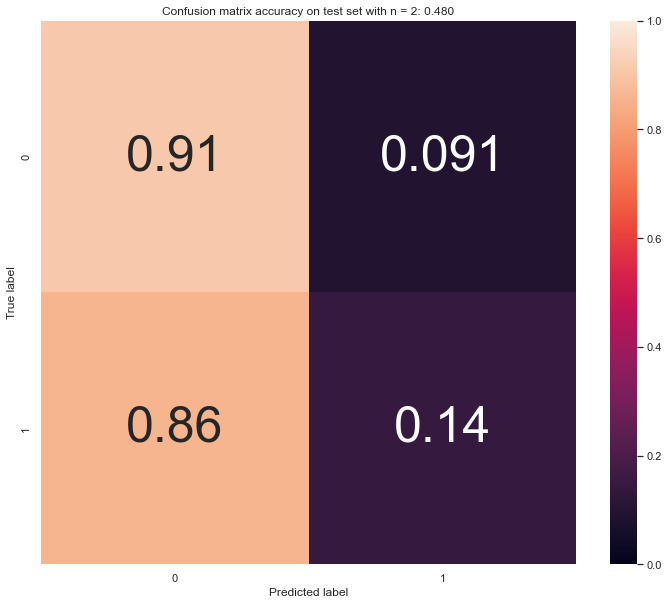

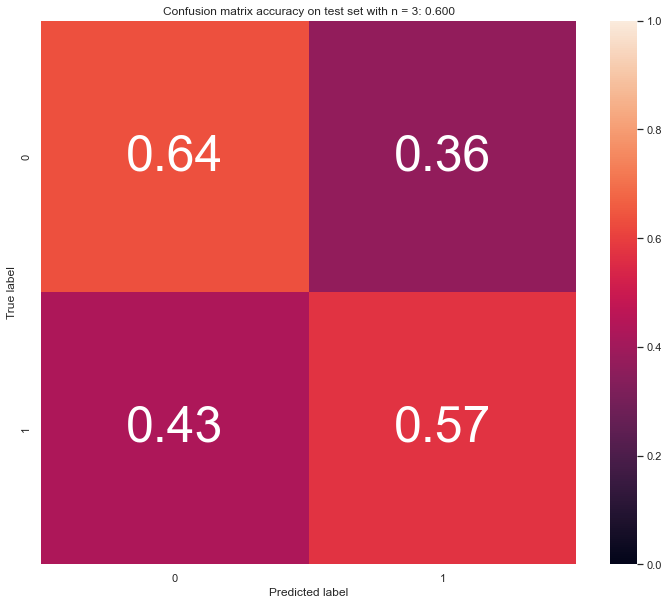

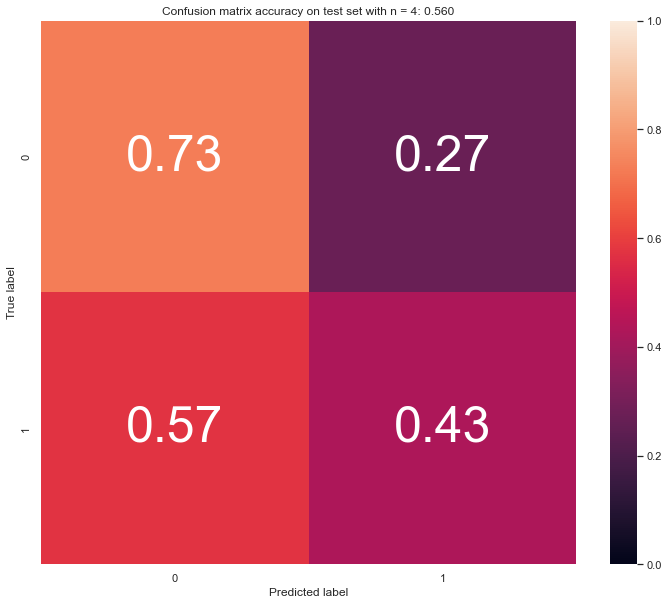

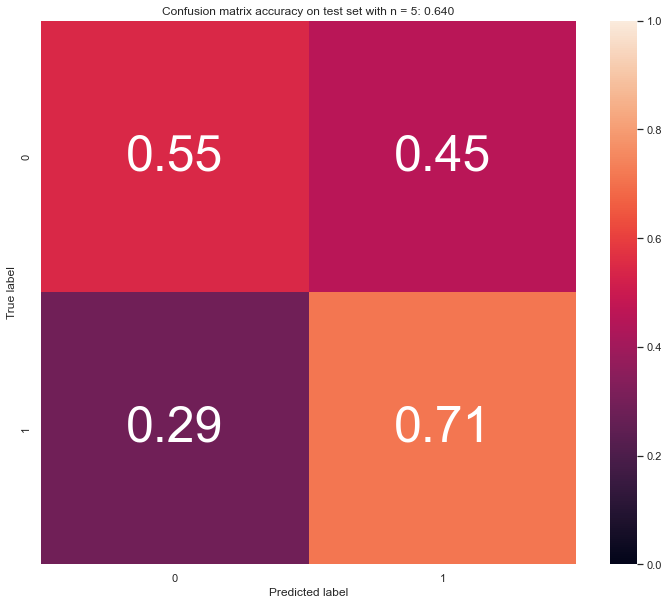

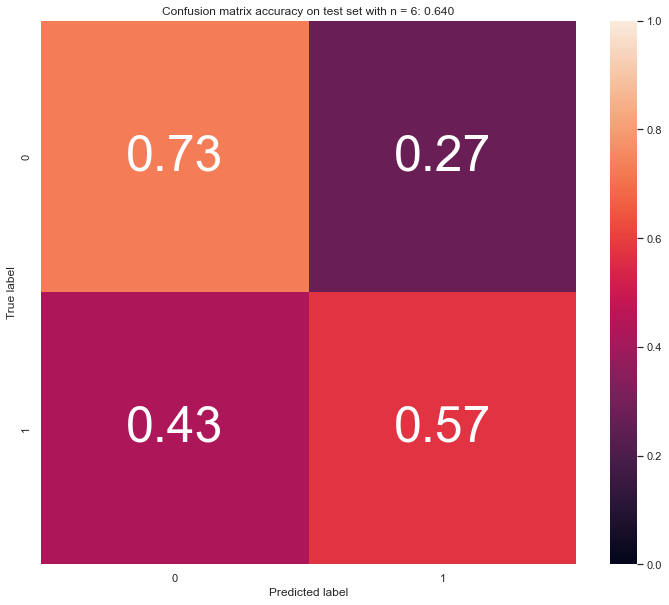

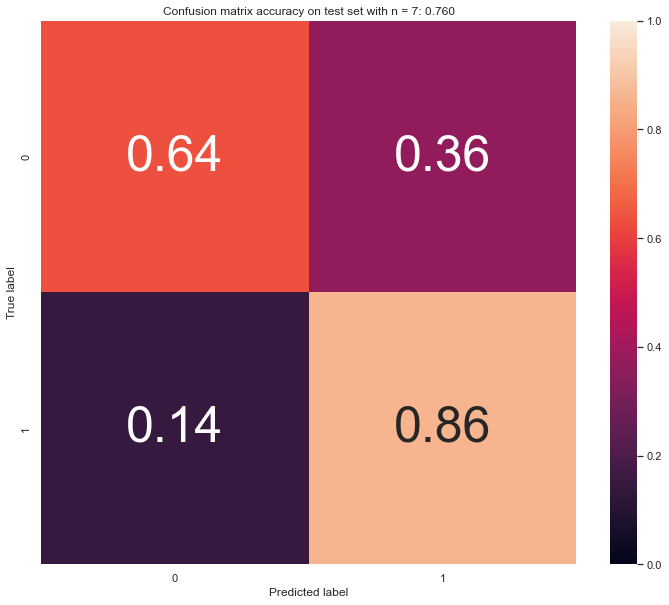

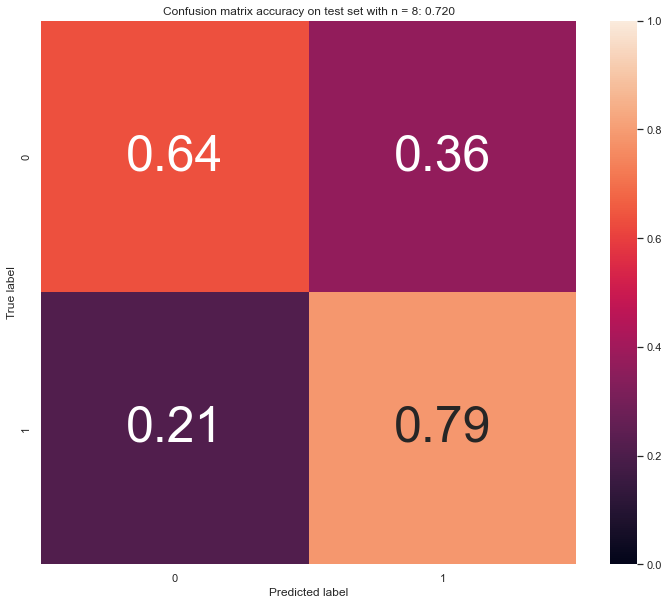

In [31]:
from itertools import product
n = [2,3,4,5,6,7,8]
for no in (n): # with product we can iterate through all possible combinations
    knn= KNeighborsClassifier(n_neighbors=no,
                              metric='minkowski', 
                              p=2)
    knn.fit(X_train, y_train)
    prediction_test = knn.predict(X=X_test)
    print('Classification accuracy on test set with n = {}: {:.3f}'.format(no, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with n = {}: {:.3f}'.format(no, accuracy_score(y_test,prediction_test)))

In [32]:
df=pd.DataFrame(data=images_sift_glcm)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']


#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [33]:
from itertools import product
n = [2,3,4,5,6,7,8]
for no in (n): # with product we can iterate through all possible combinations
    knn= KNeighborsClassifier(n_neighbors=no,
                              metric='minkowski', 
                              p=2)
    knn.fit(X_train, y_train)
    prediction_test = knn.predict(X=X_test)
    print('Classification accuracy on test set with algorithm = {} and n = {}: {:.3f}'.format(a, no, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with algorithm = {} and n = {}: {:.3f}'.format(a, no, accuracy_score(y_test,prediction_test)))

NameError: name 'a' is not defined

# Logistic Regression

In [ ]:
df=pd.DataFrame(data=images_sift)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']


#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from itertools import product
#solver = ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
#penalty = ['l2']
#solver = ['saga']
#penalty = ['l1']
#solver = ['newton-cg','lbfgs','sag', 'saga']
#penalty = ['none']

for s,p in product(solver,penalty): # with product we can iterate through all possible combinations
    log = LogisticRegression(solver=s,
                             penalty=p)
    log.fit(X_train, y_train)
    prediction_test = log.predict(X=X_test)
    print('Classification accuracy on test set with solver = {} and penalty = {}: {:.3f}'.format(s, p, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with solver = {} and penalty = {}: {:.3f}'.format(s, p, accuracy_score(y_test,prediction_test)))

In [ ]:
df=pd.DataFrame(data=images_sift_glcm)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']


#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from itertools import product
#solver = ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
#penalty = ['l2']
solver = ['saga']
penalty = ['l1']
#solver = ['newton-cg','lbfgs','sag', 'saga']
#penalty = ['none']

for s,p in product(solver,penalty): # with product we can iterate through all possible combinations
    log = LogisticRegression(solver=s,
                             penalty=p)
    log.fit(X_train, y_train)
    prediction_test = log.predict(X=X_test)
    print('Classification accuracy on test set with solver = {} and penalty = {}: {:.3f}'.format(s, p, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with solver = {} and penalty = {}: {:.3f}'.format(s, p, accuracy_score(y_test,prediction_test)))

# Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
log = LogisticRegression(solver='sag',penalty='l2')
log.fit(X_train, y_train)
scores = cross_val_score(log, X_test, y_test, cv=5)
print(scores.mean())